In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cancer_Data.csv')

# Understand the data structure
print("Shape of the dataset:", df.shape)

Shape of the dataset: (569, 33)


In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
for column in df.columns:
    print(column)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


# 📚 The main features of the dataset are as follows:
### id: Represents a unique ID of each patient.
### diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
### radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.
### Other features contain specific ranges of average values of the features of the cancer image:radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean

In [5]:
df.drop(["id","Unnamed: 32"], axis = 1, inplace = True)
#"axis = 1" indicates to delete the whole column |"inpalce = True" means replace master data, does not create a copy


In [6]:
print("Columns and data types:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
print("Summary statistics:\n", df.describe())

Summary statistics:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


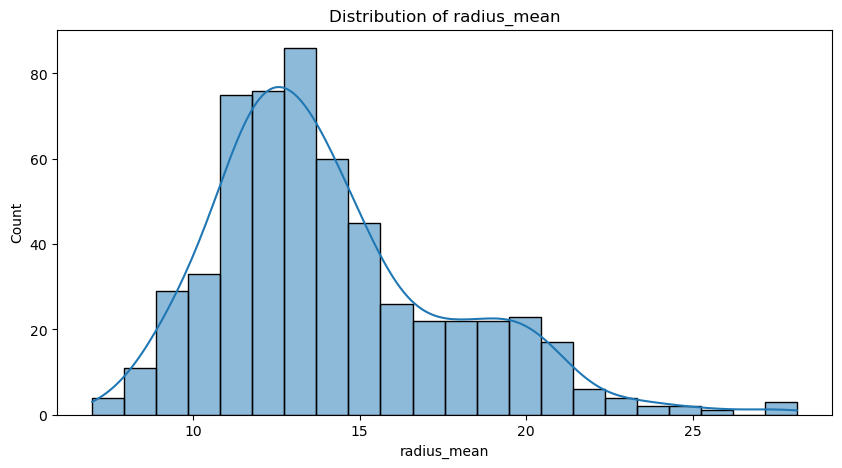

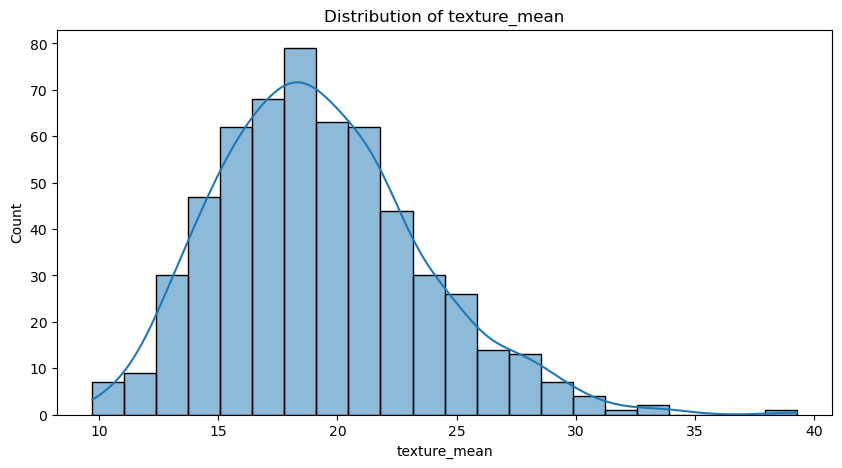

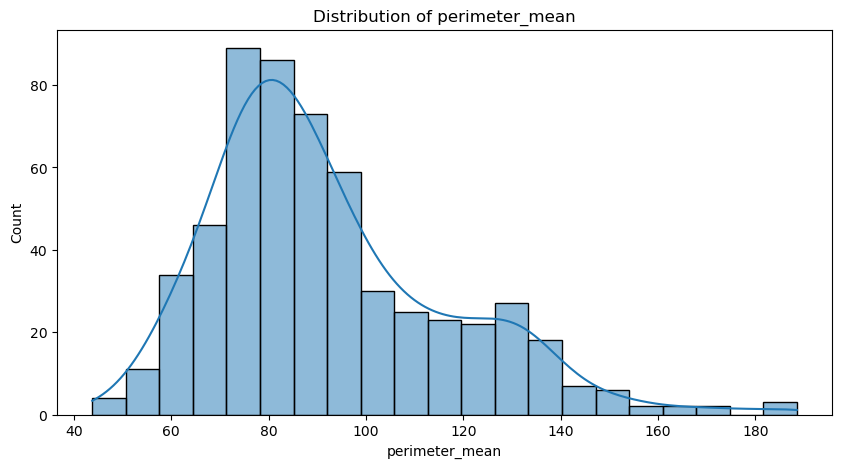

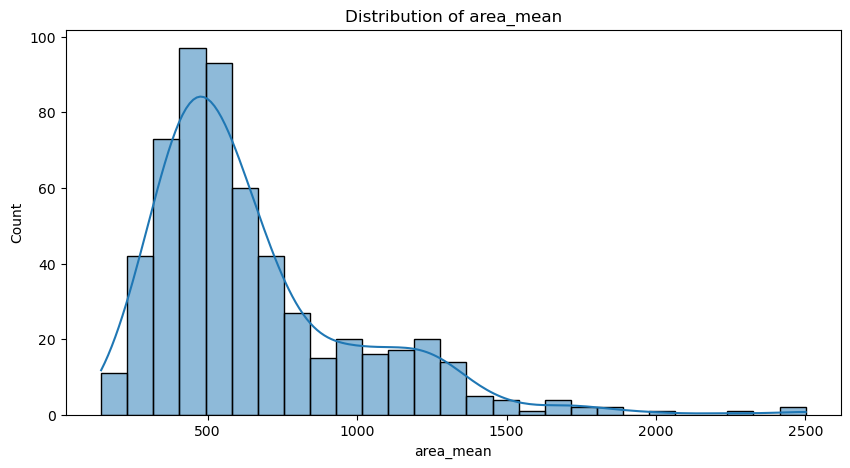

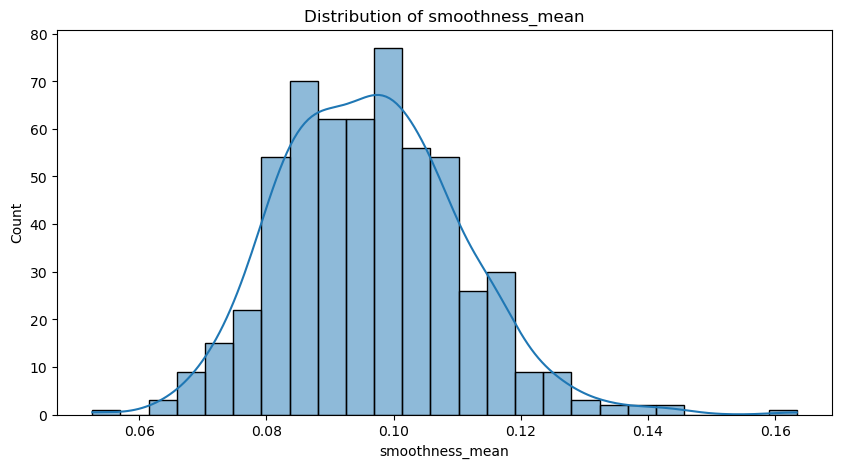

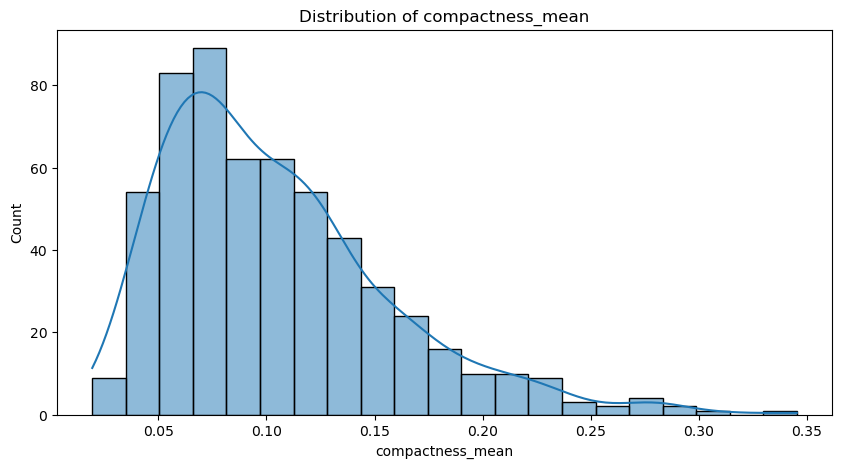

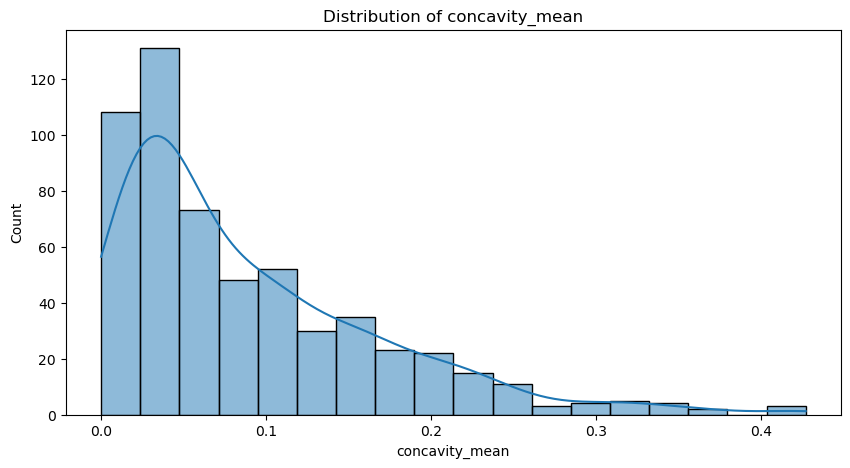

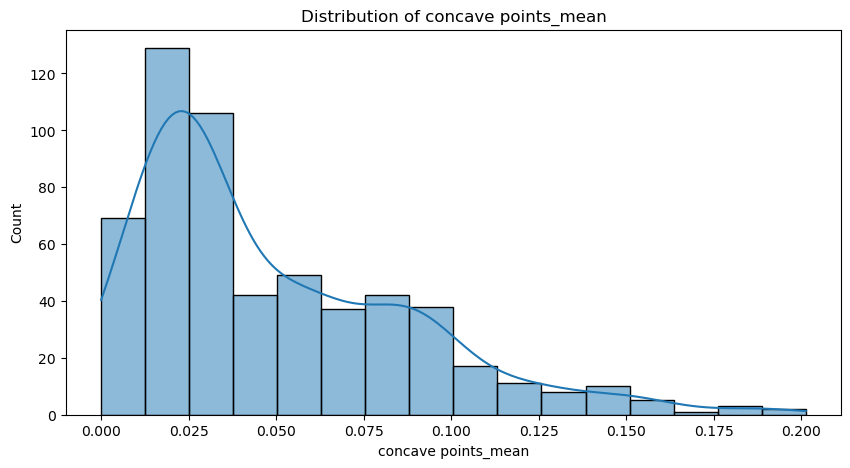

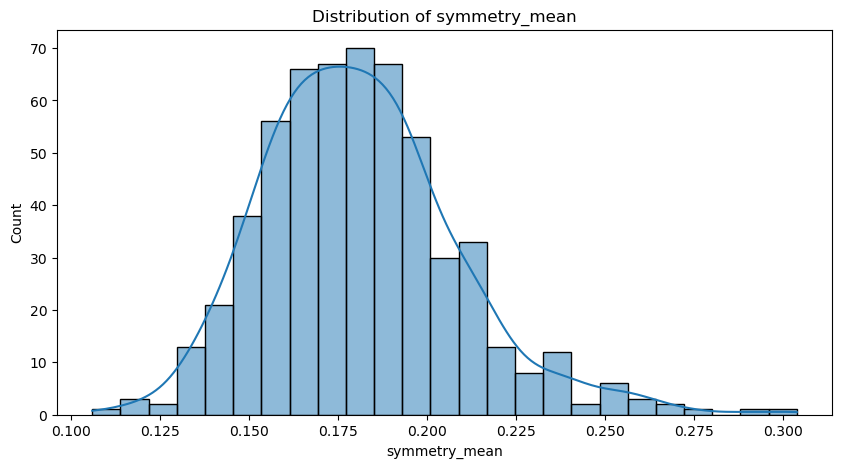

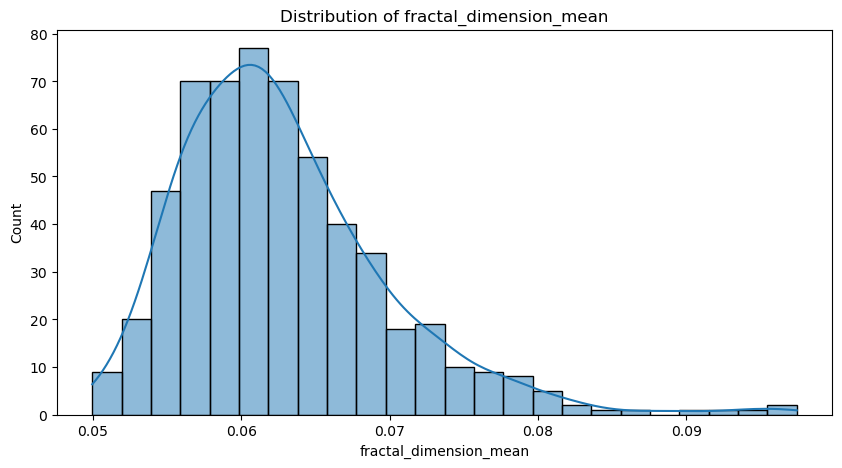

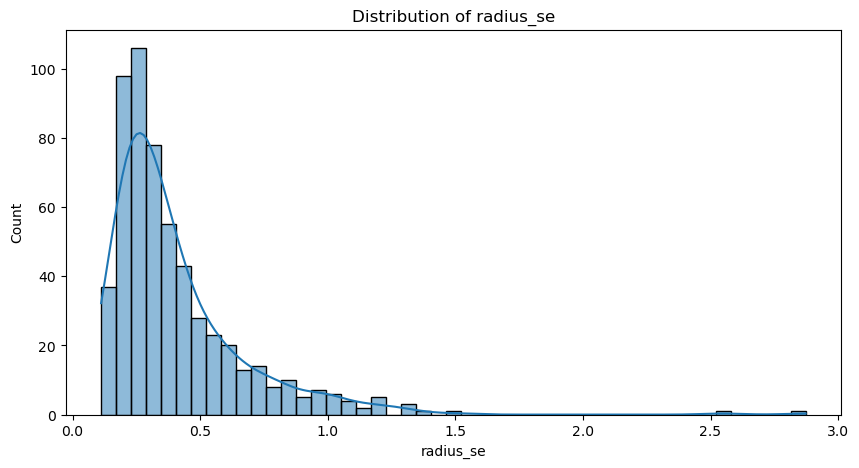

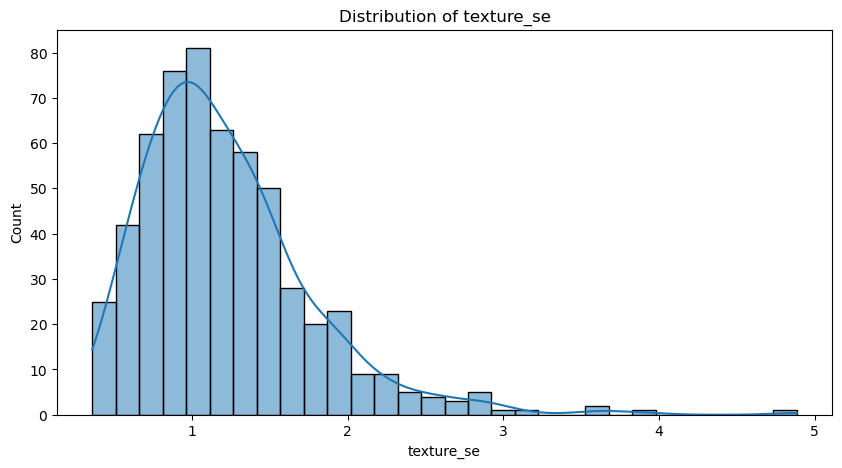

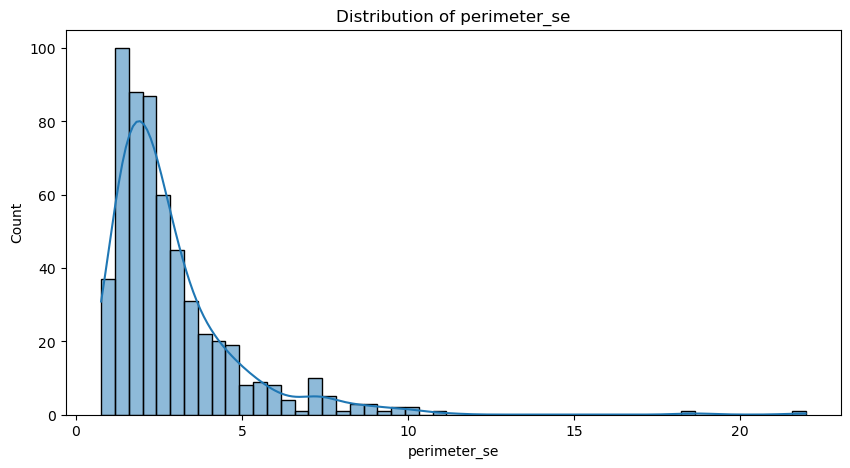

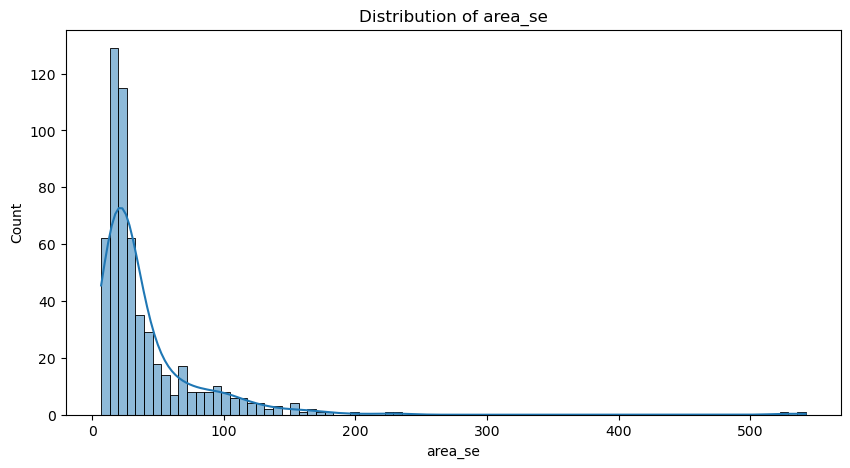

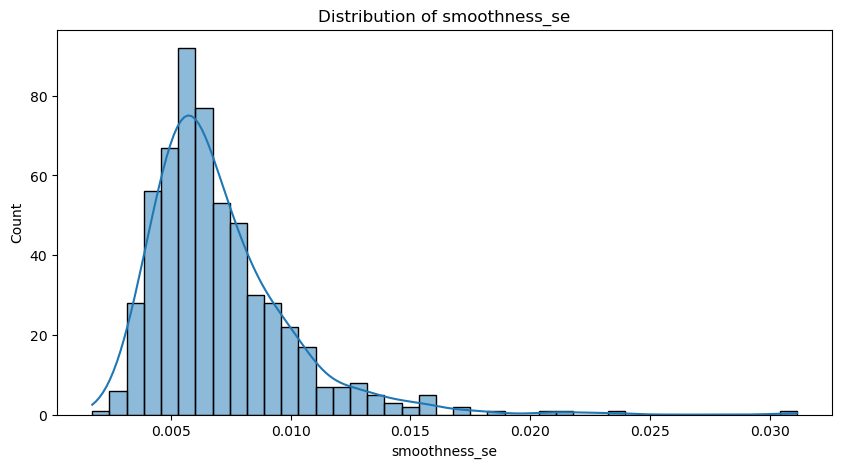

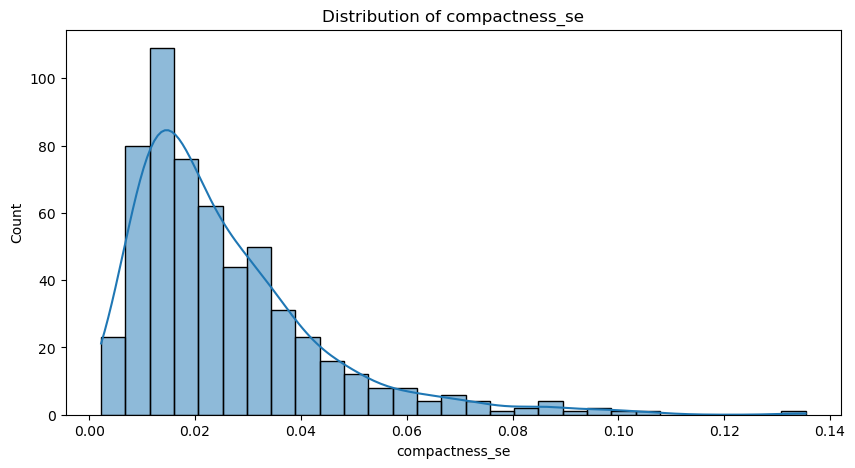

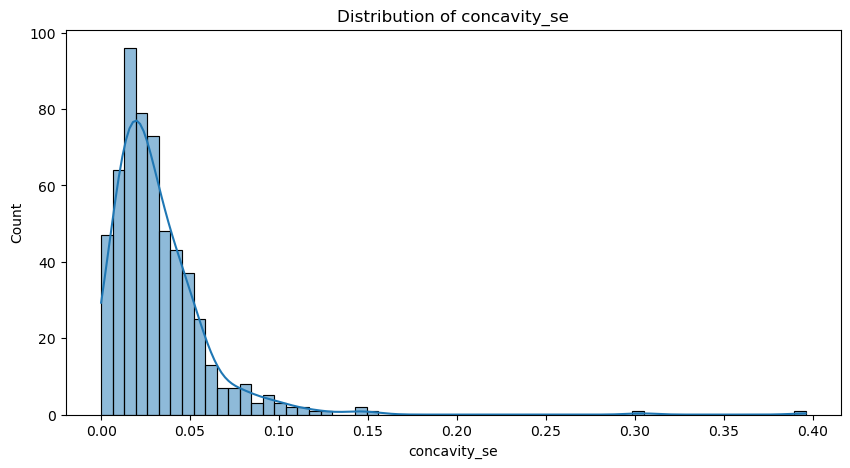

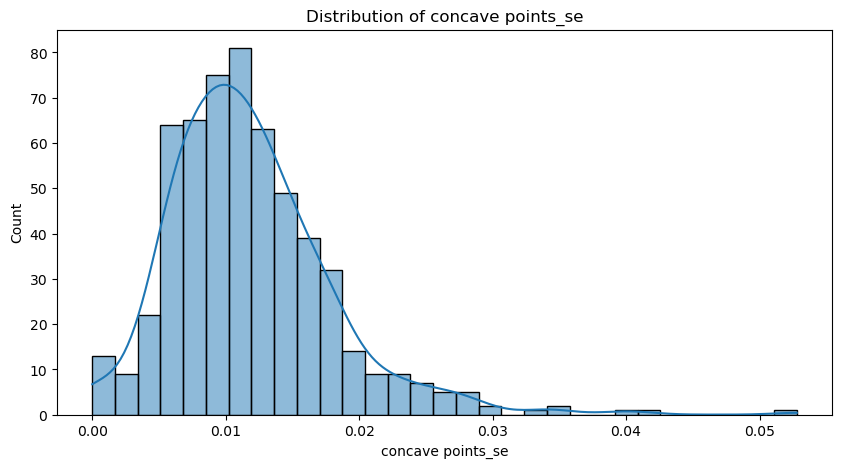

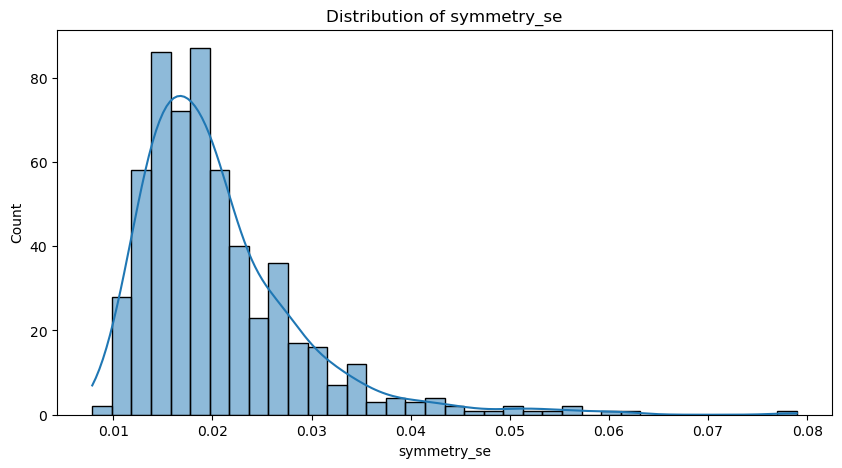

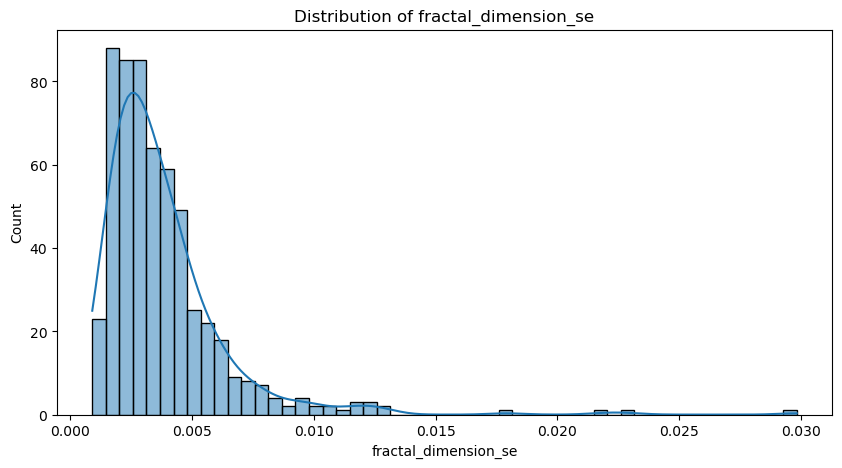

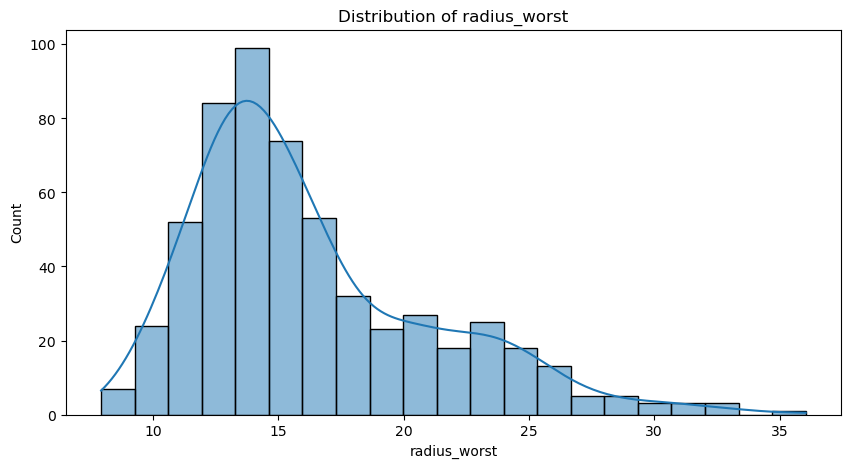

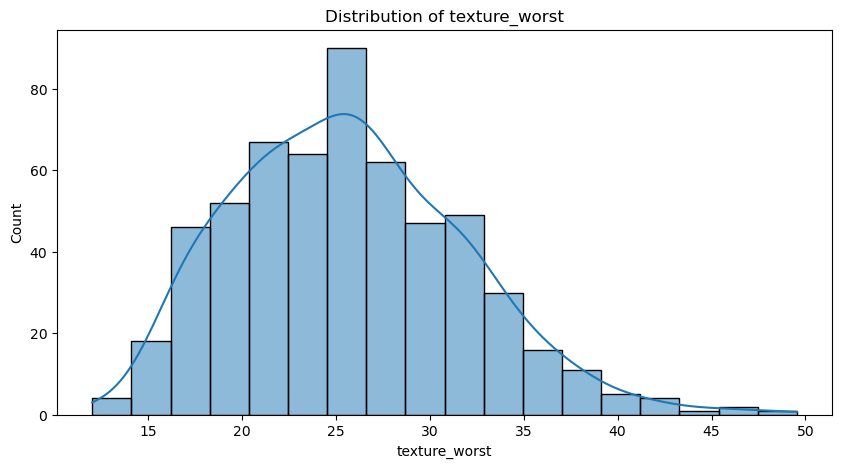

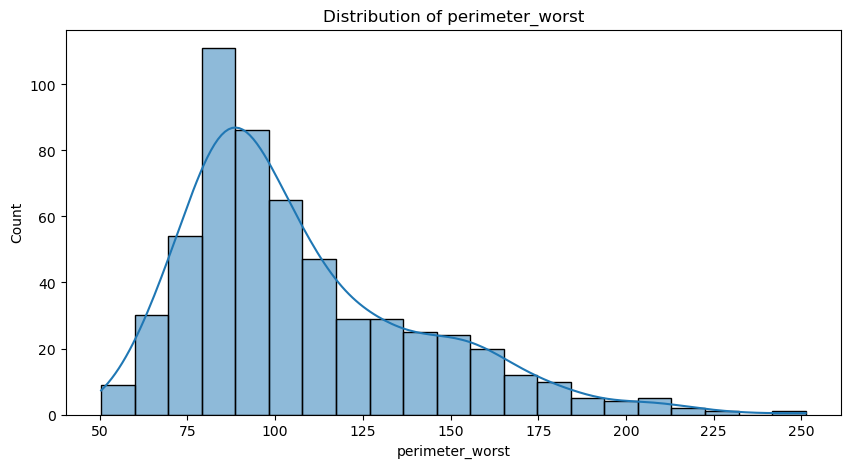

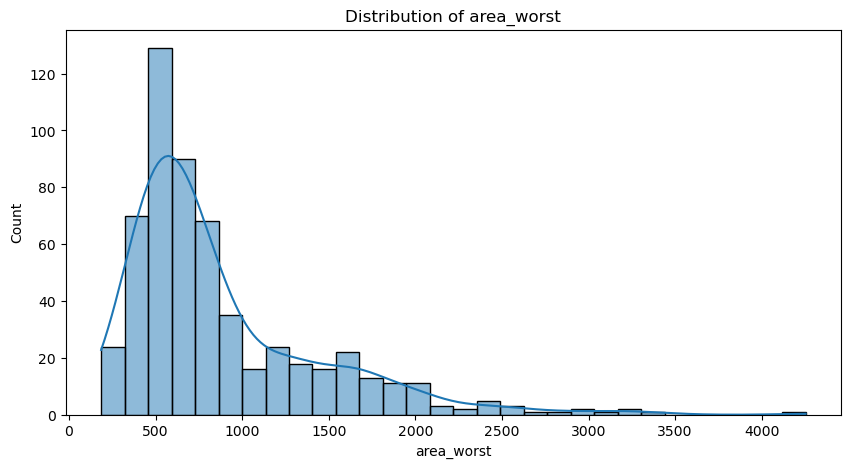

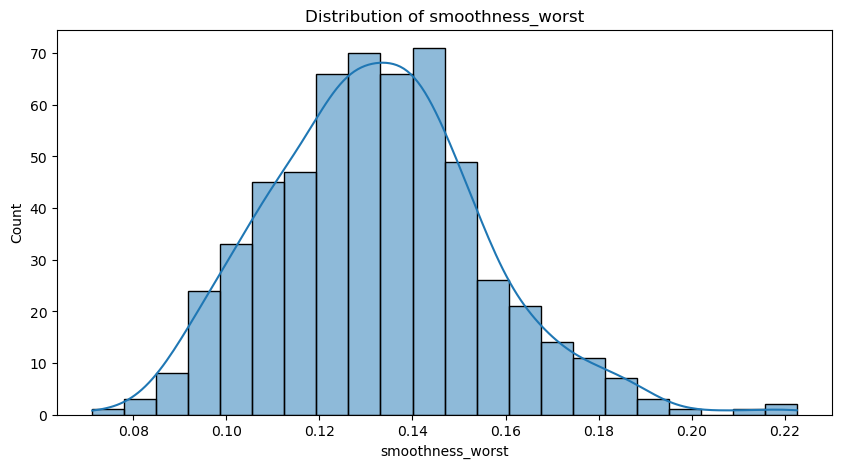

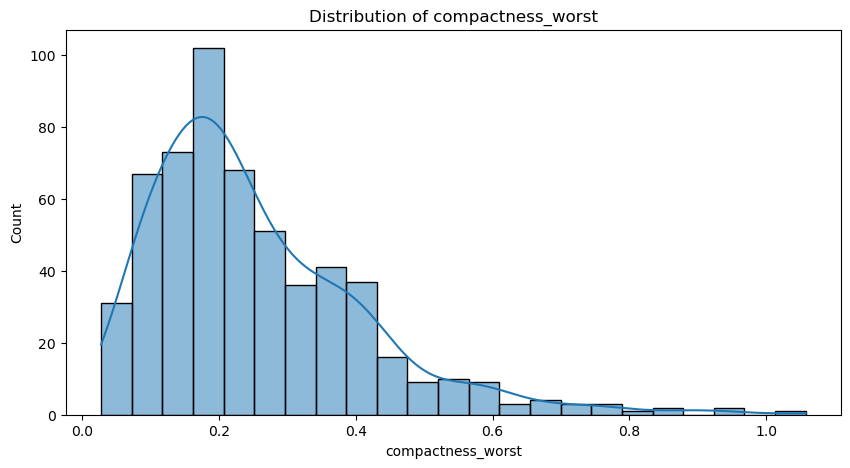

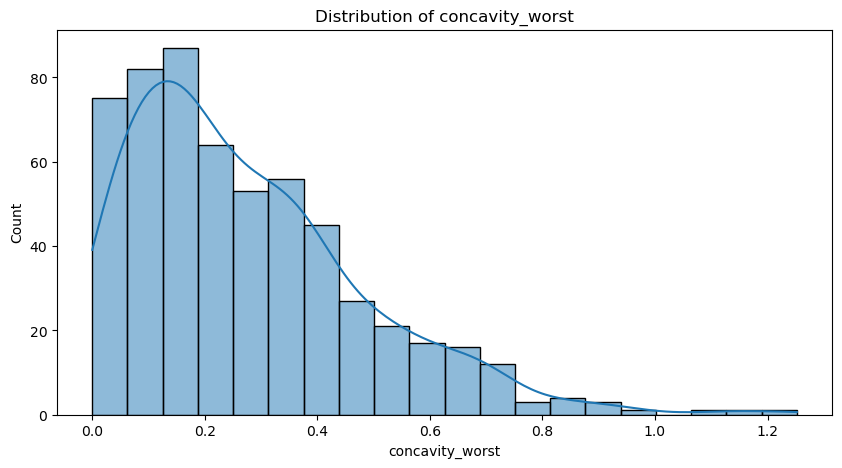

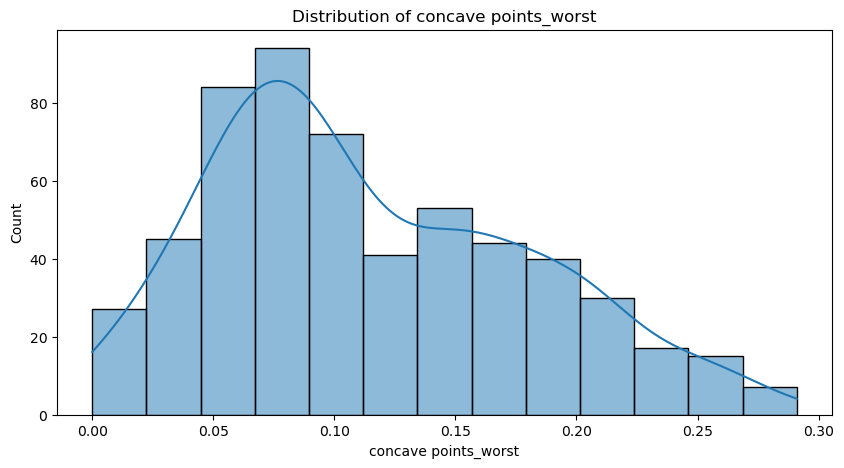

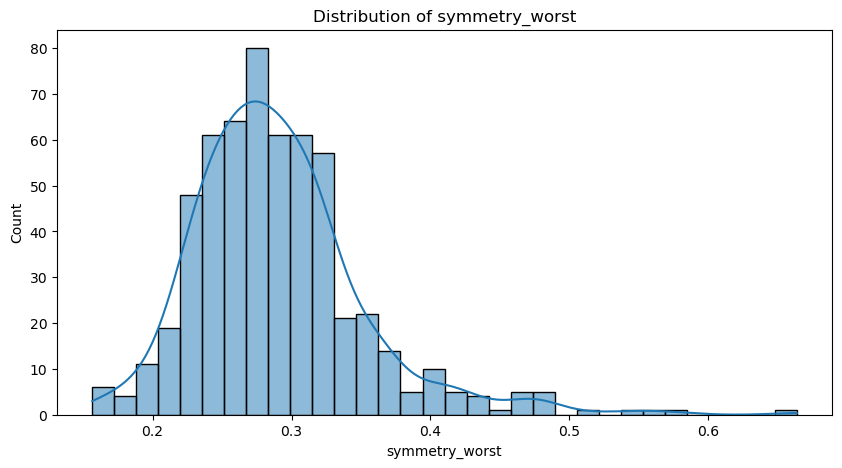

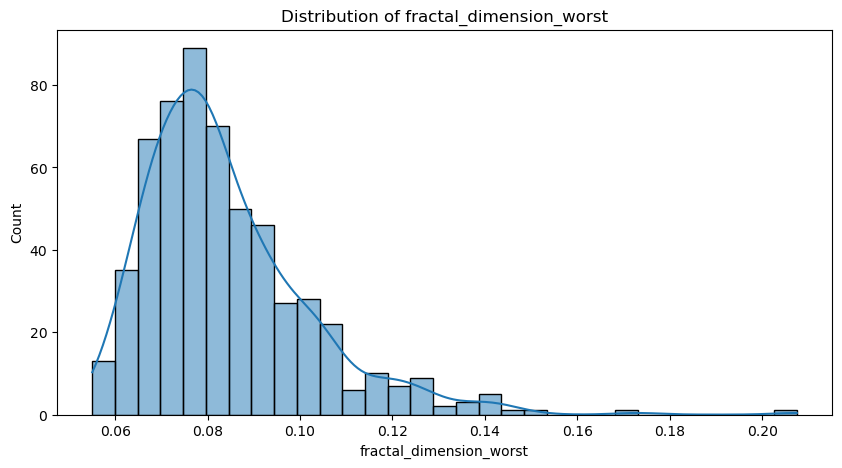

In [10]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

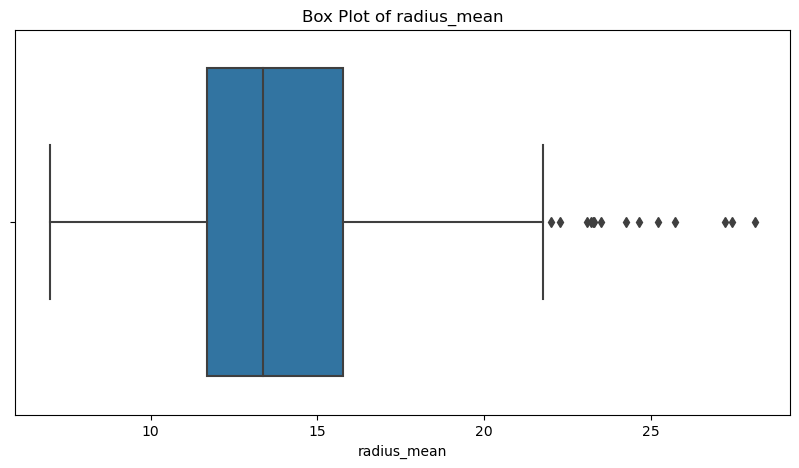

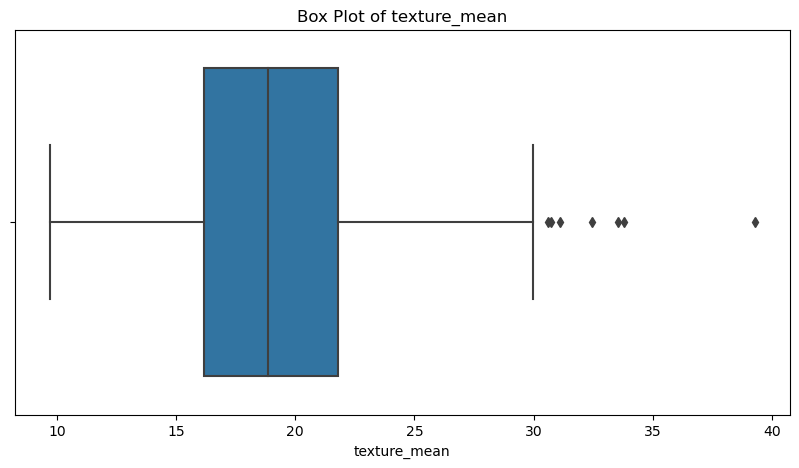

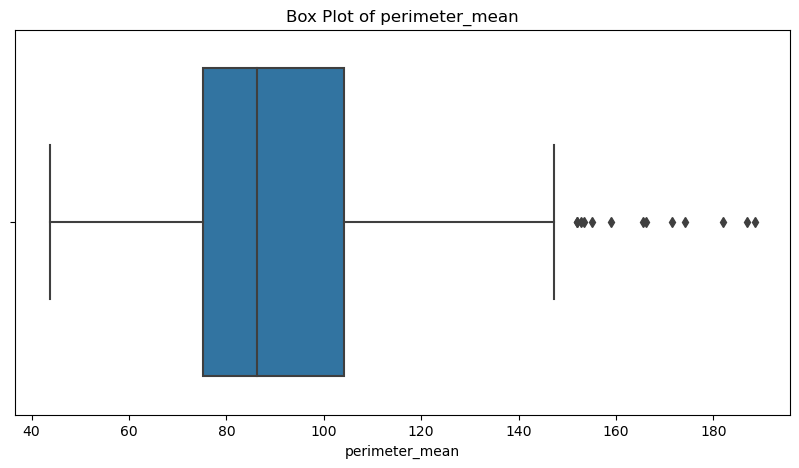

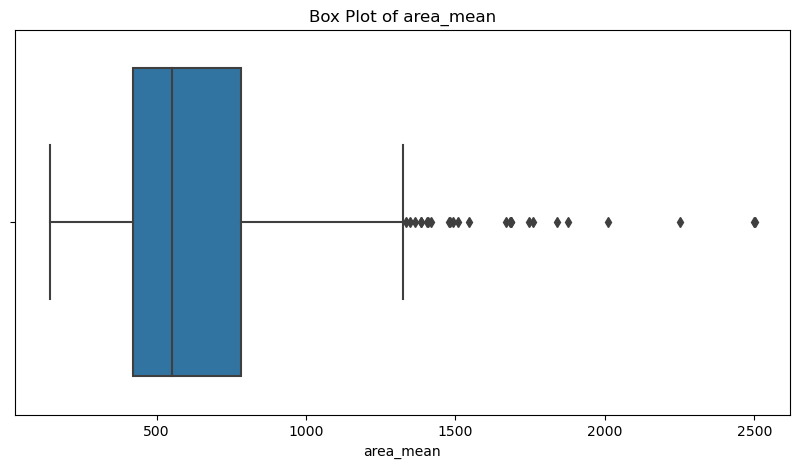

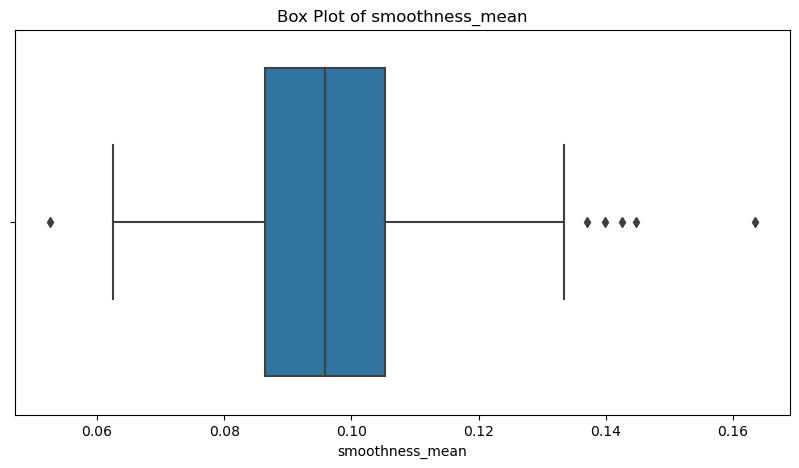

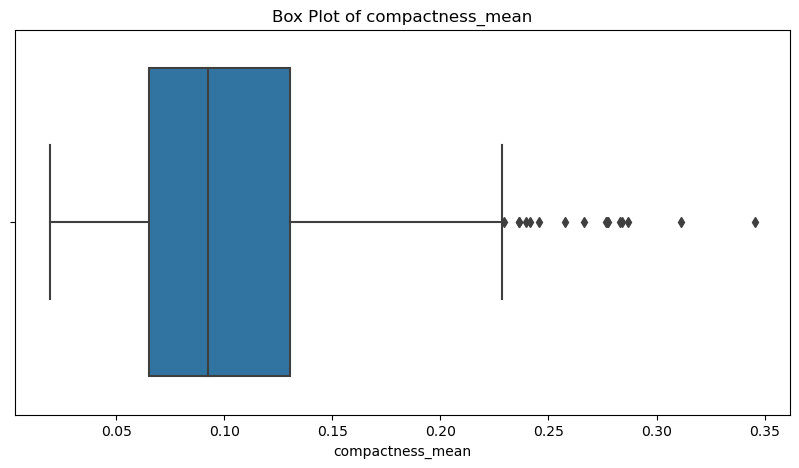

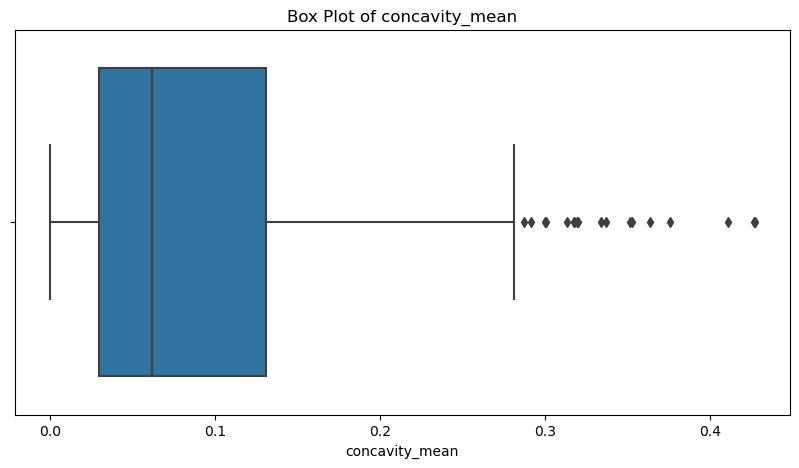

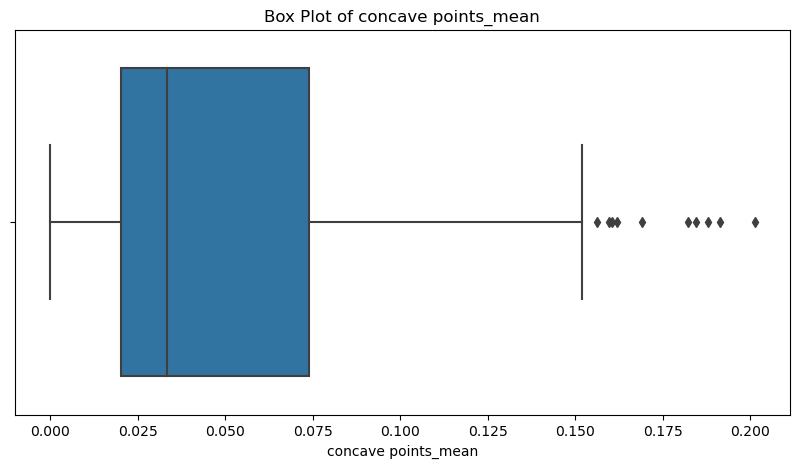

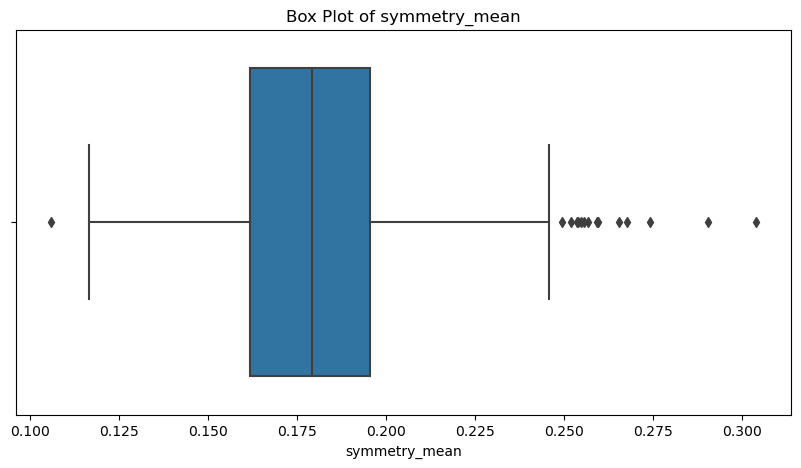

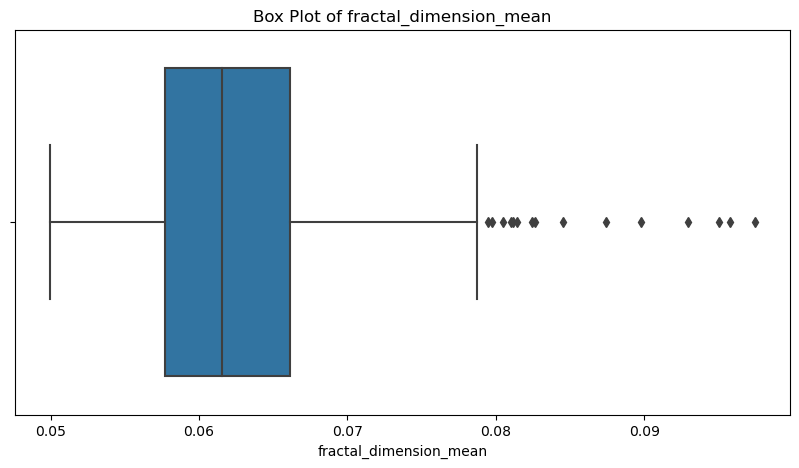

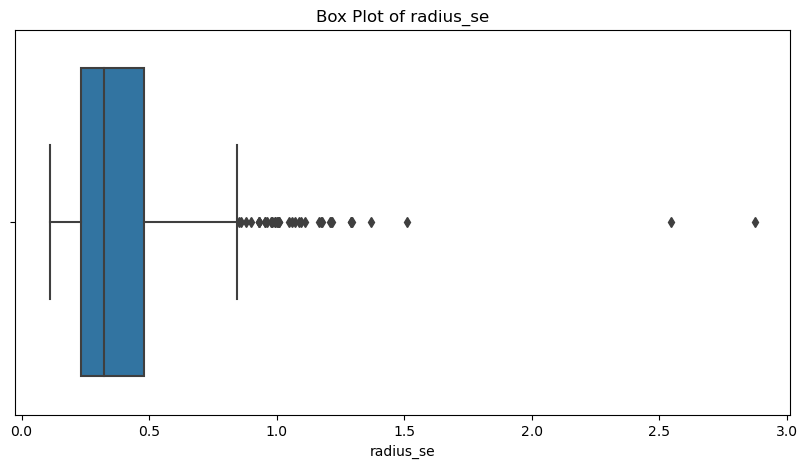

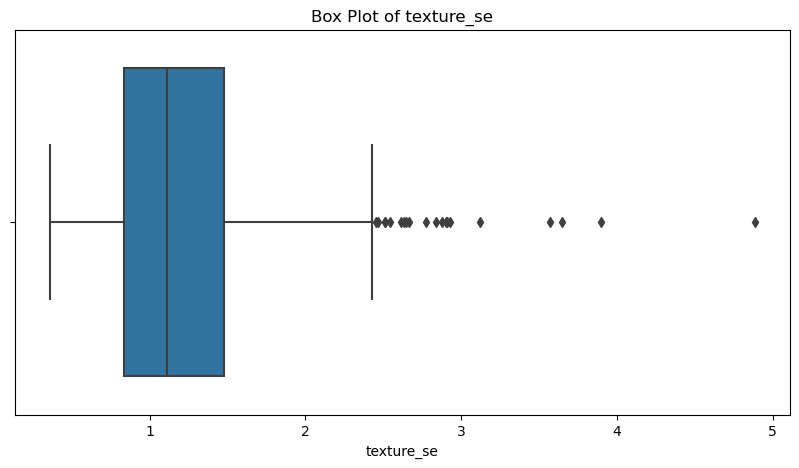

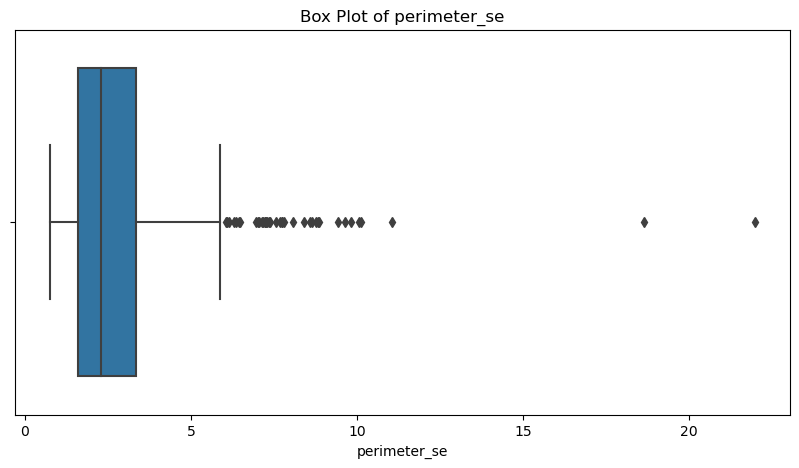

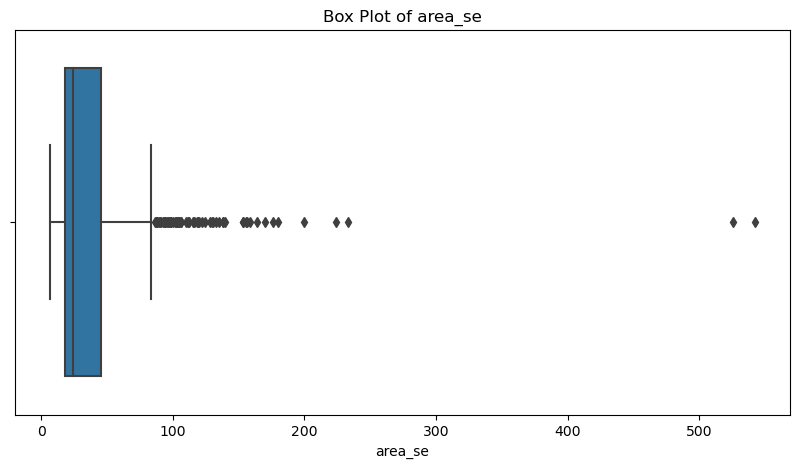

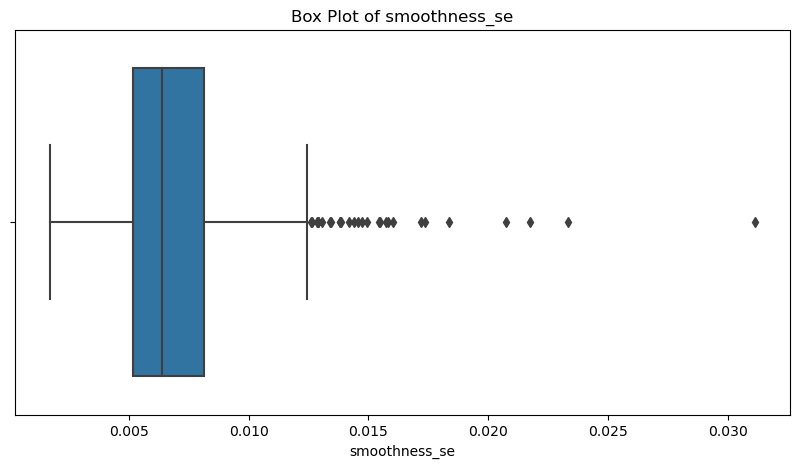

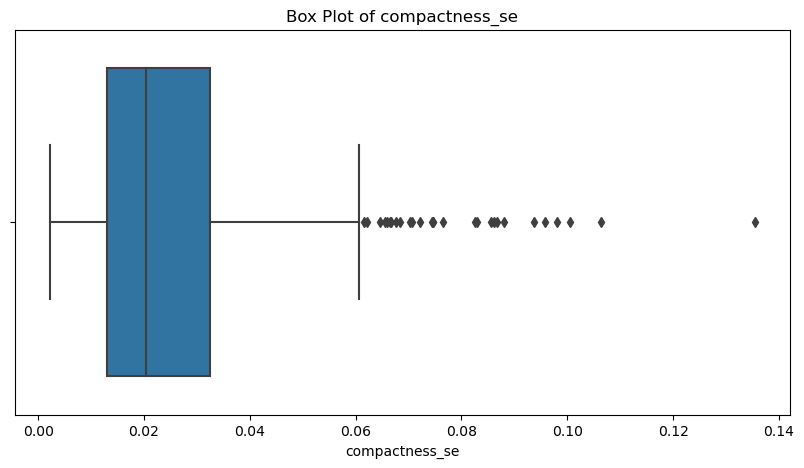

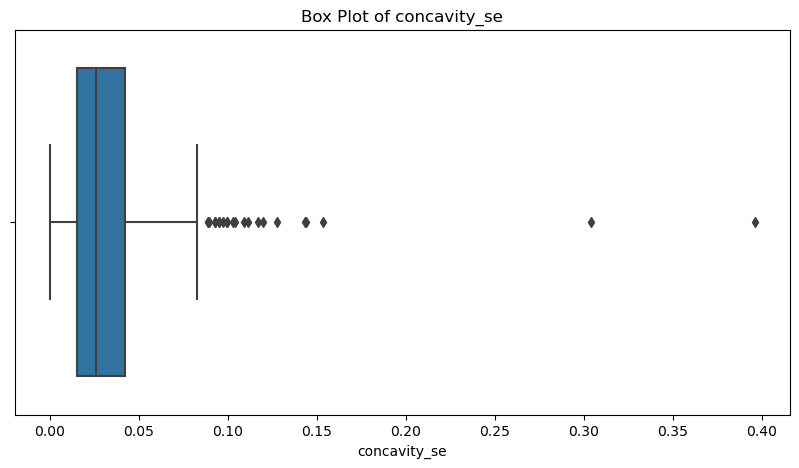

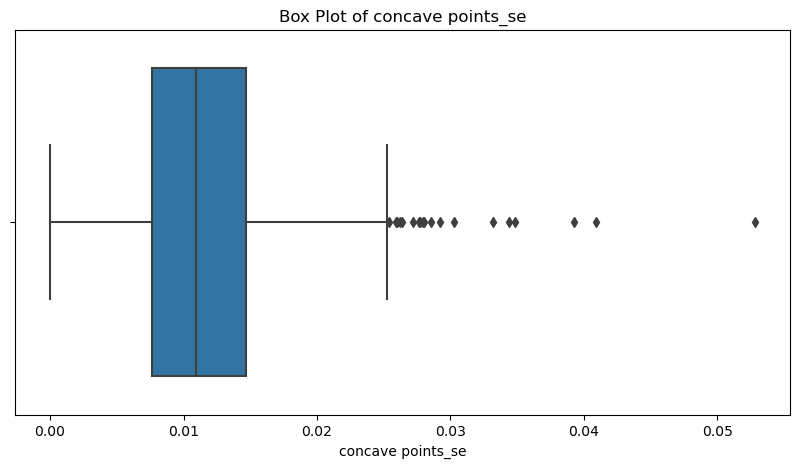

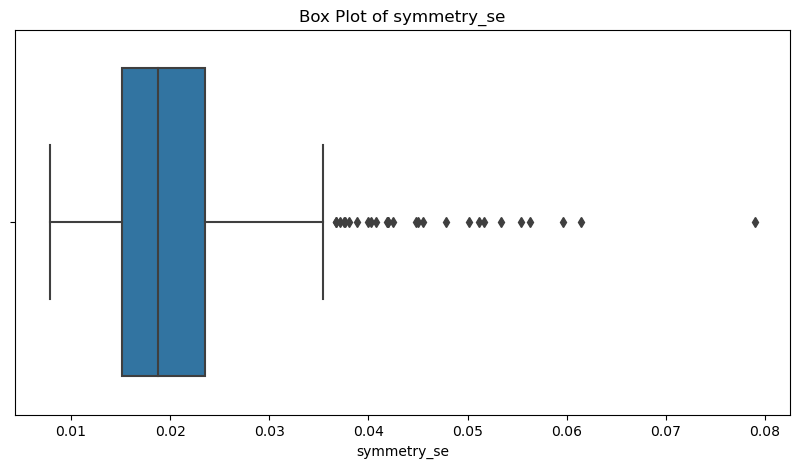

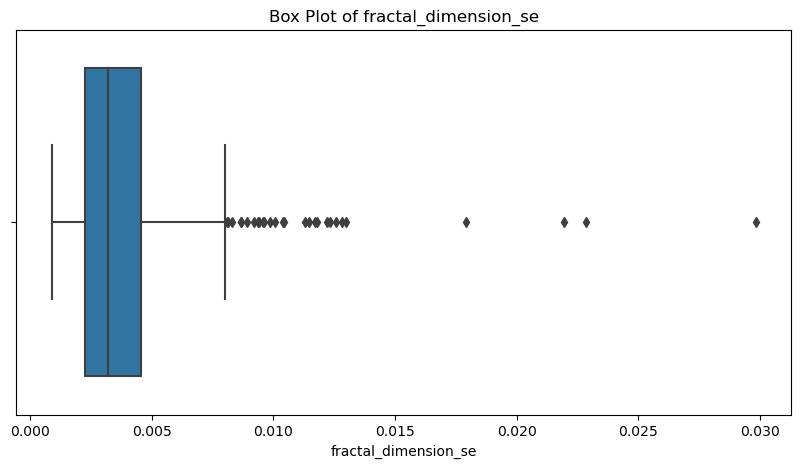

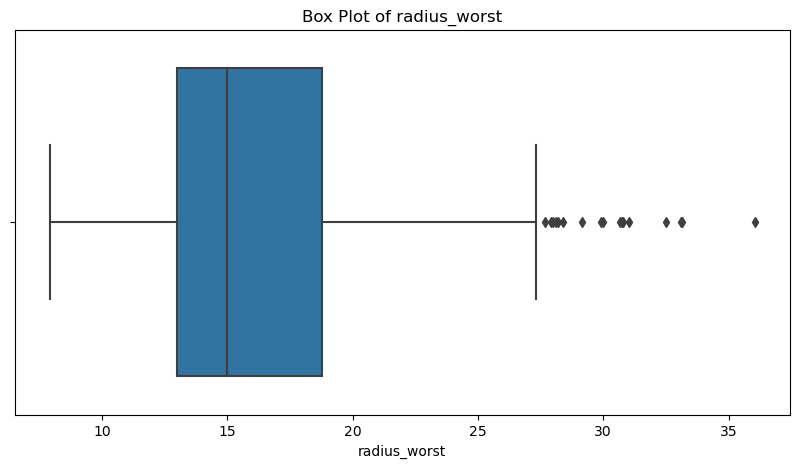

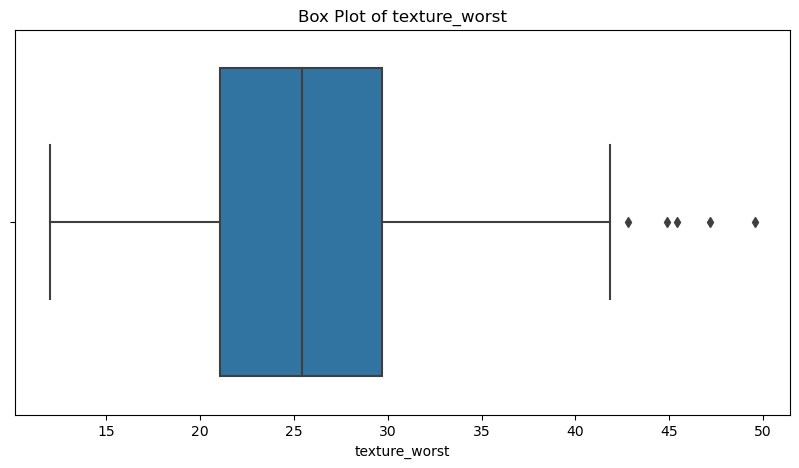

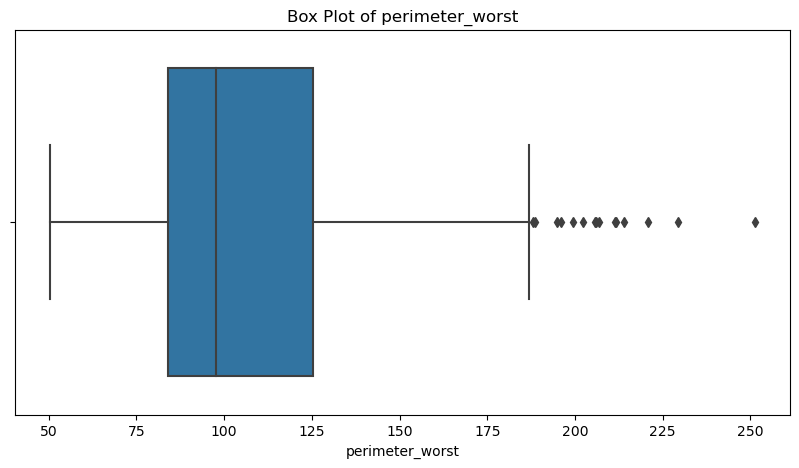

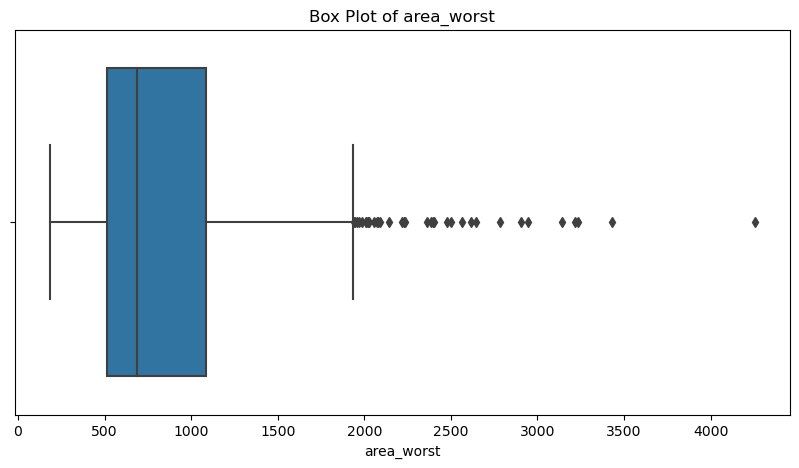

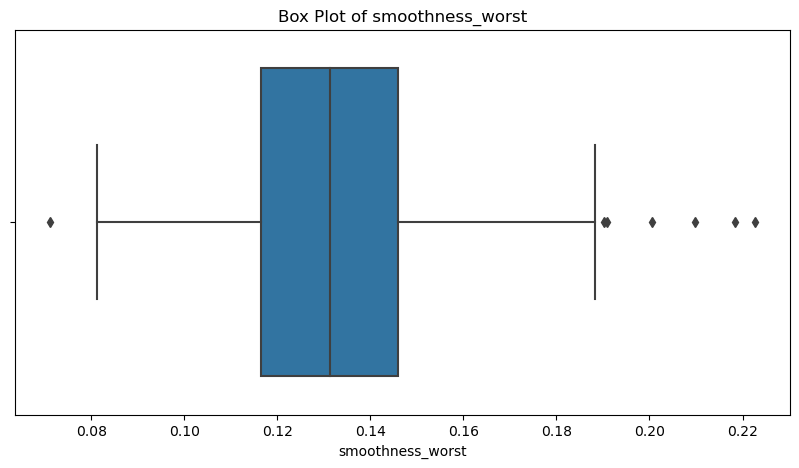

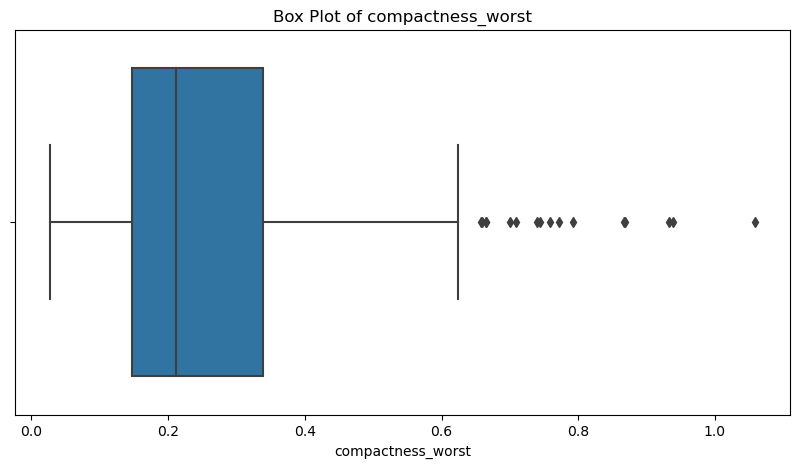

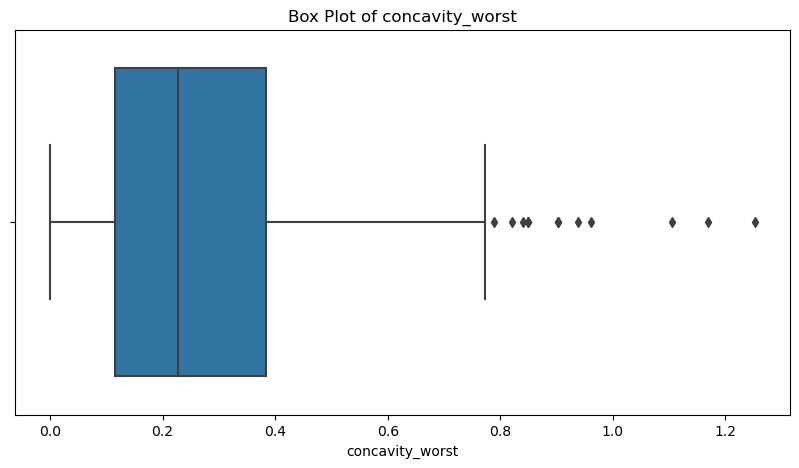

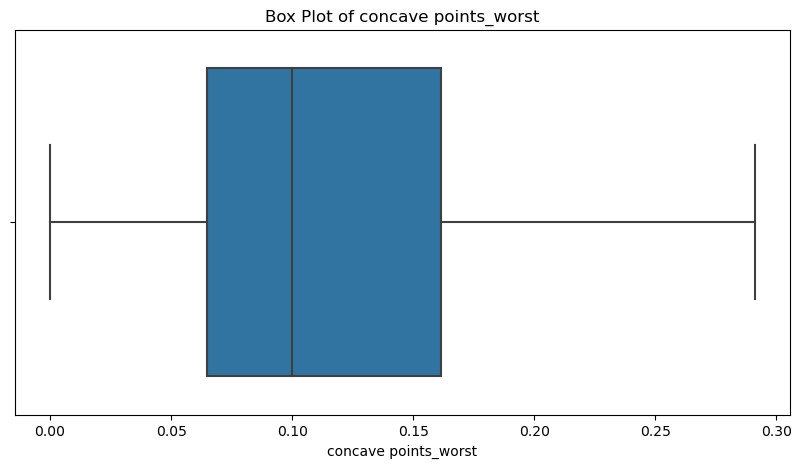

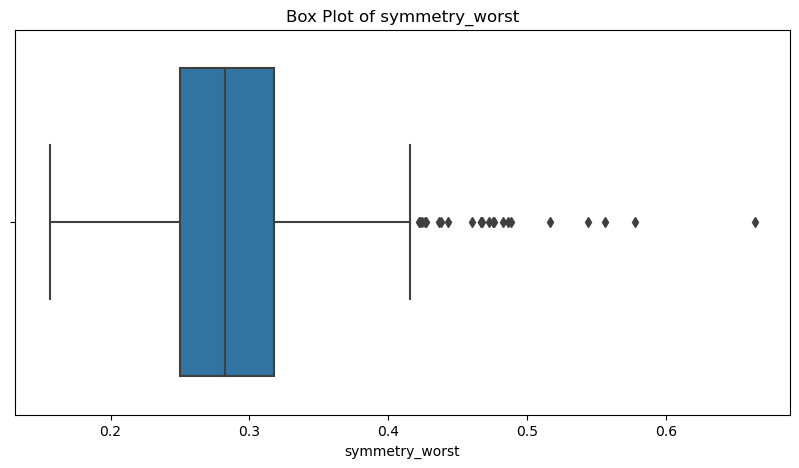

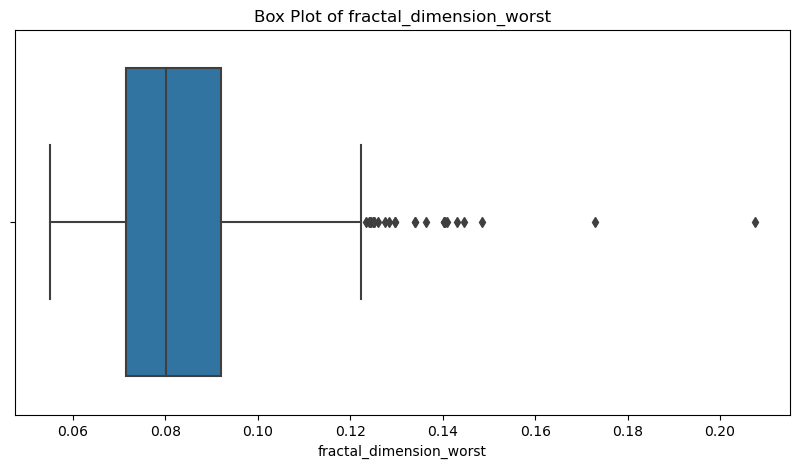

In [11]:
# Create box plots for each numeric column
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

### Instead of removing outliers , Capping outliers is a technique used to handle extreme values in a dataset without completely removing them. It helps in mitigating the impact of outliers on statistical analysis and machine learning models while retaining more of the original data.

In [12]:
def cap_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
columns_to_check = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
# Apply capping to each column
for column in columns_to_check:
    if column in df.columns:
        df = cap_outliers(df, column, multiplier=3.0)  

print(f"Shape of DataFrame after capping outliers: {df.shape}")
print(df.head())


Shape of DataFrame after capping outliers: (569, 31)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  

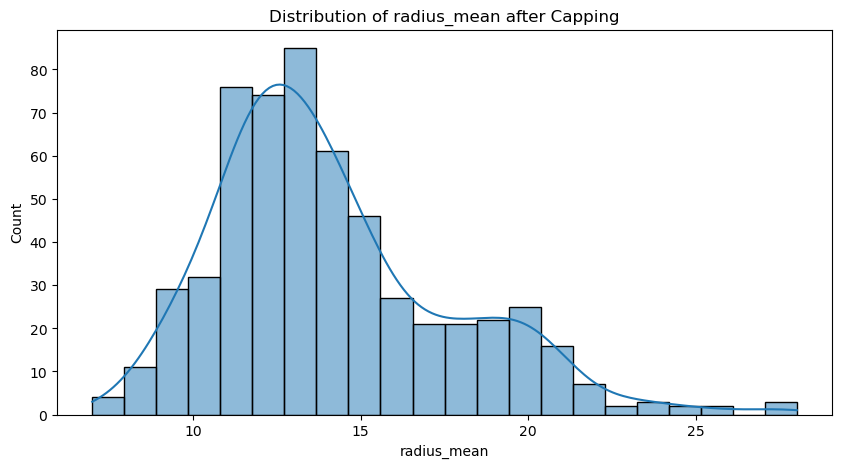

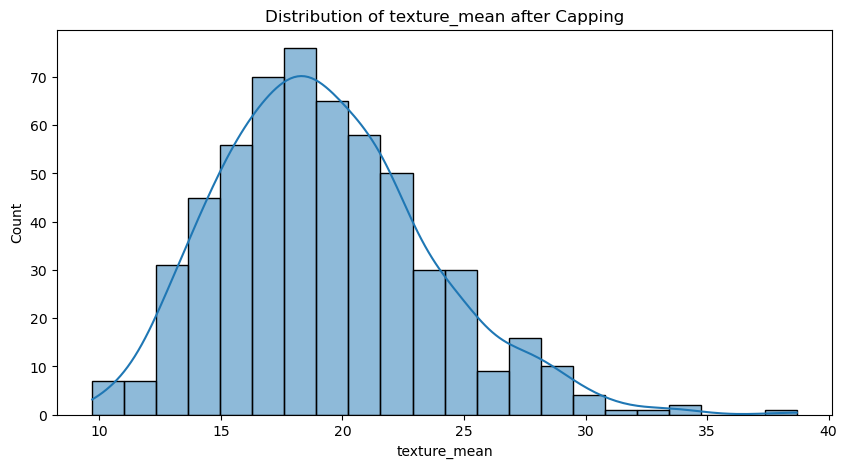

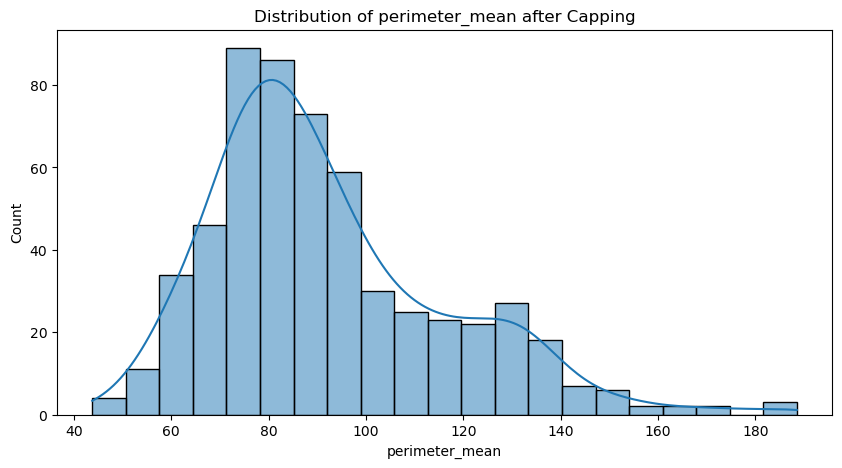

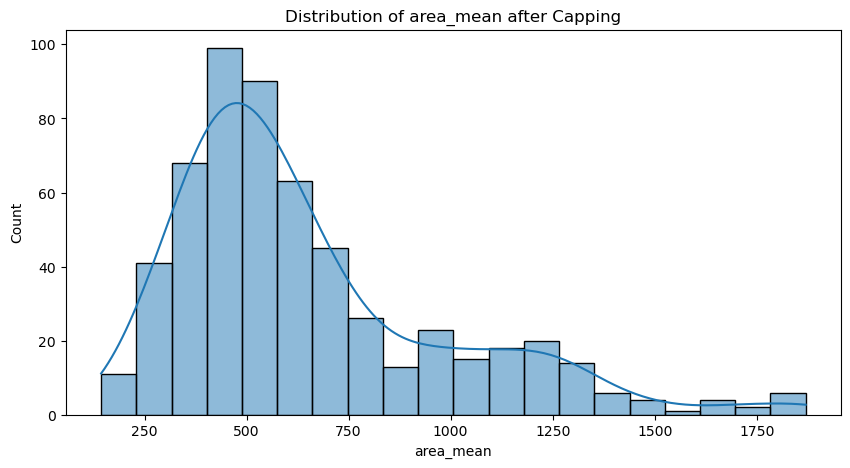

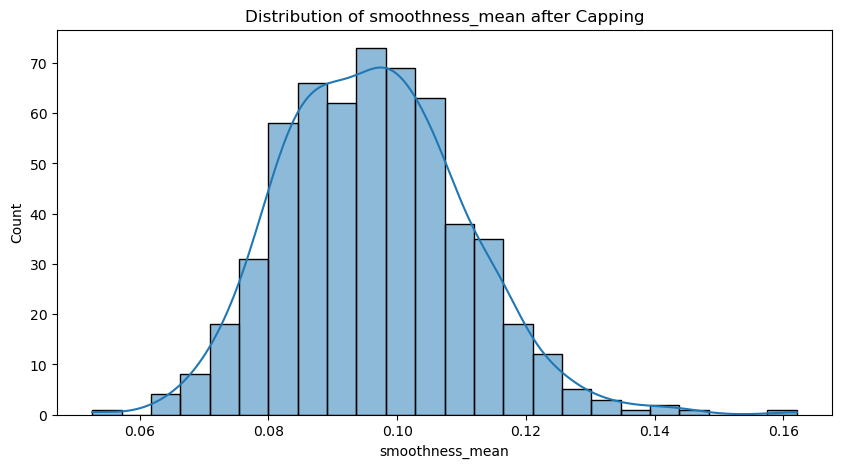

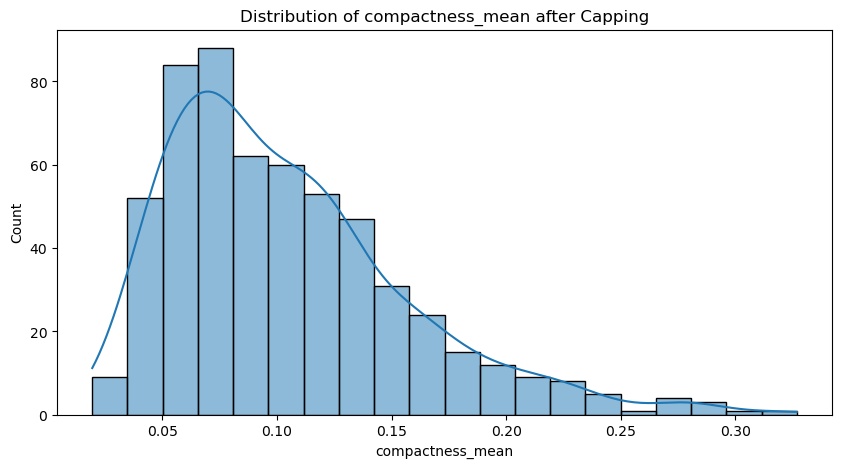

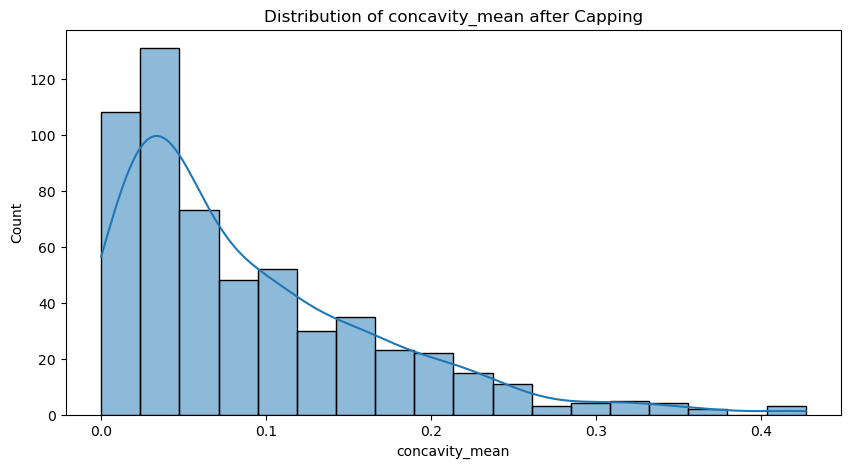

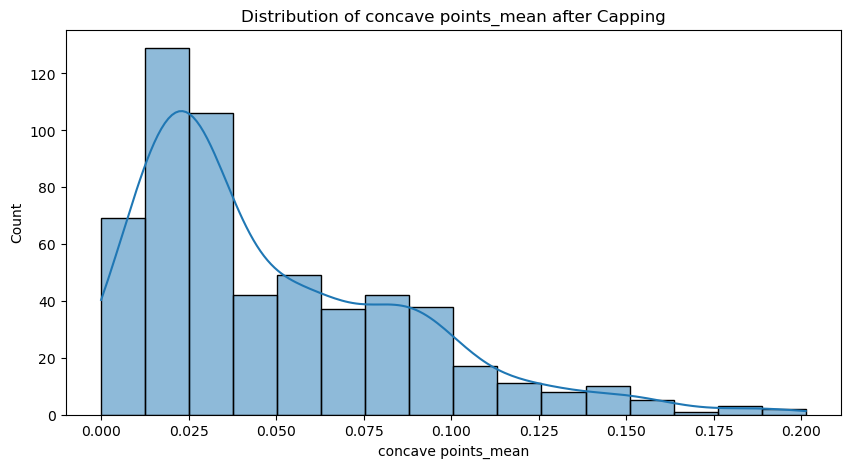

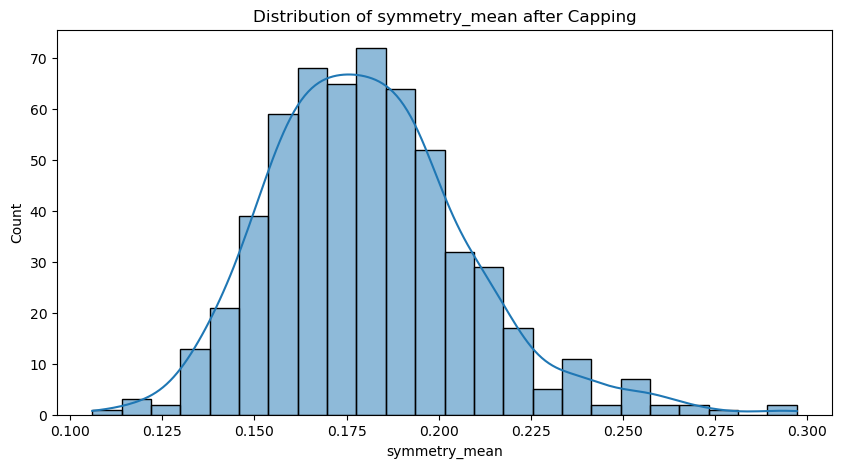

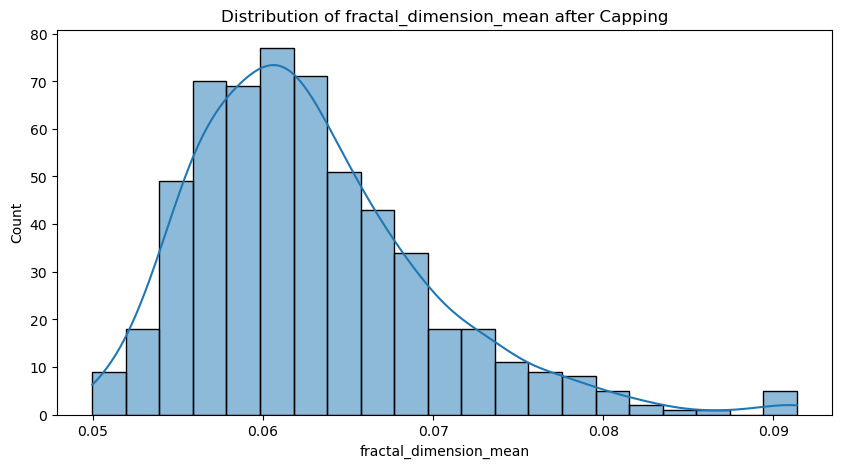

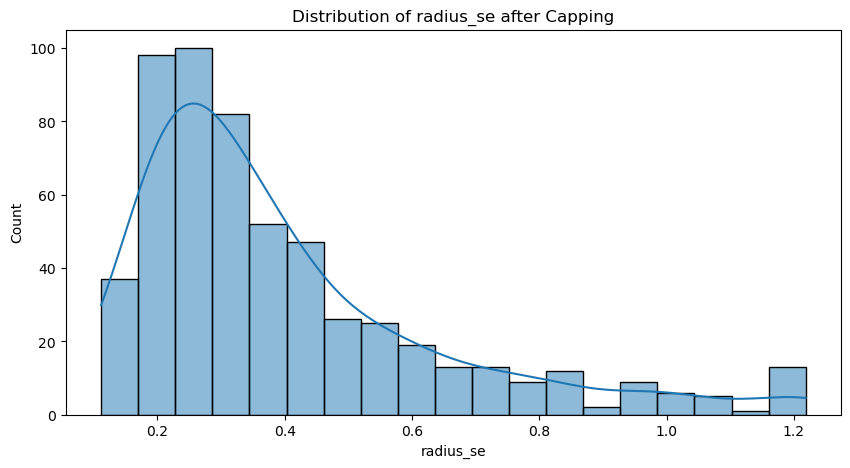

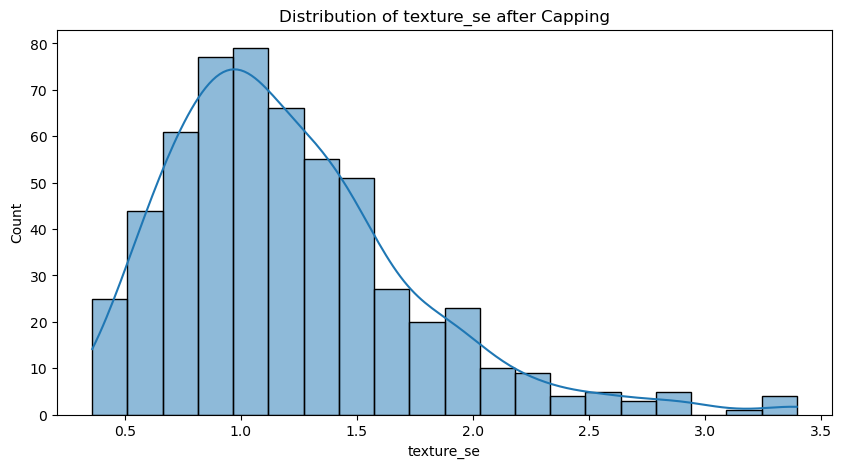

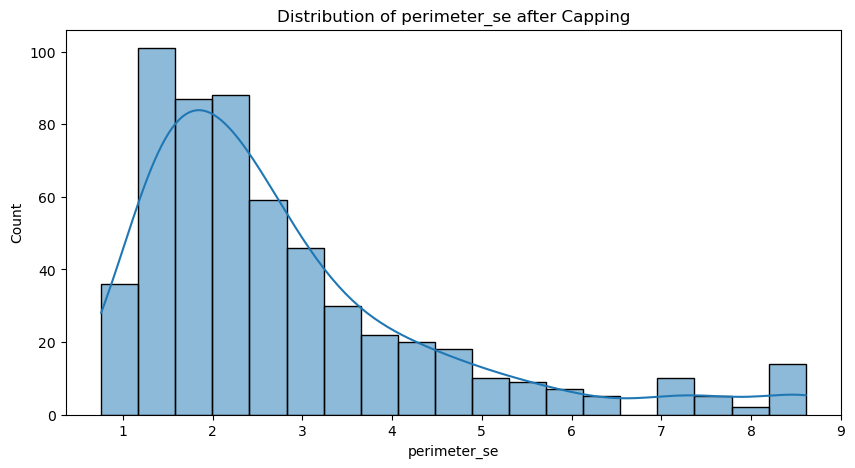

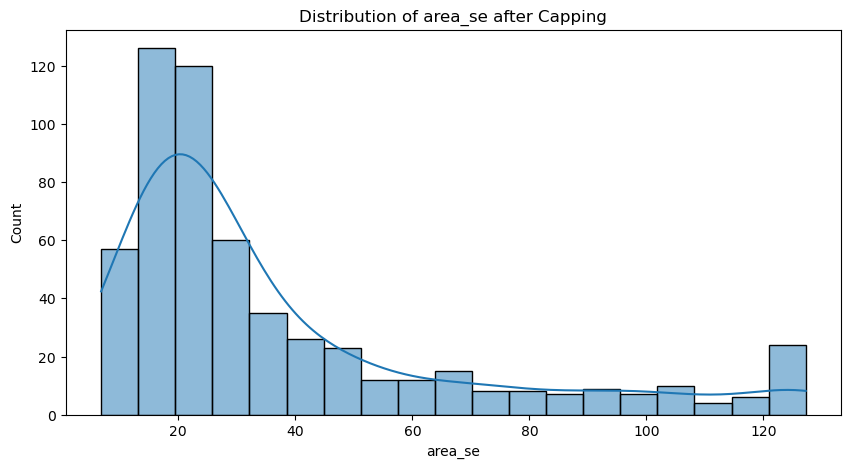

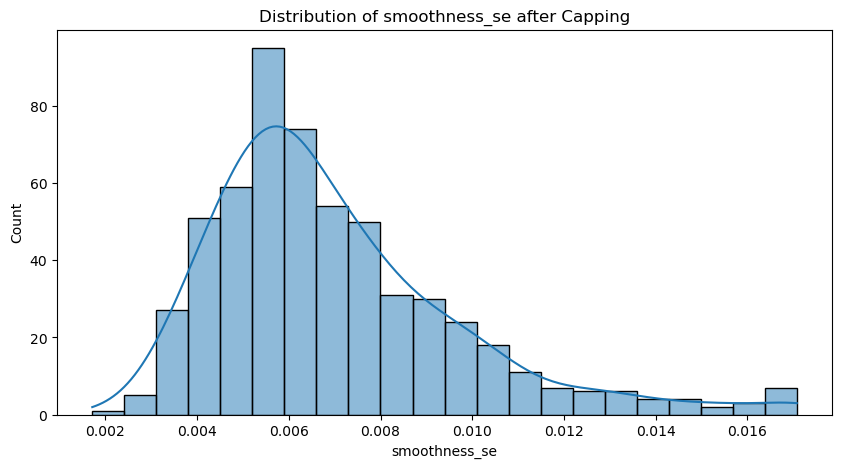

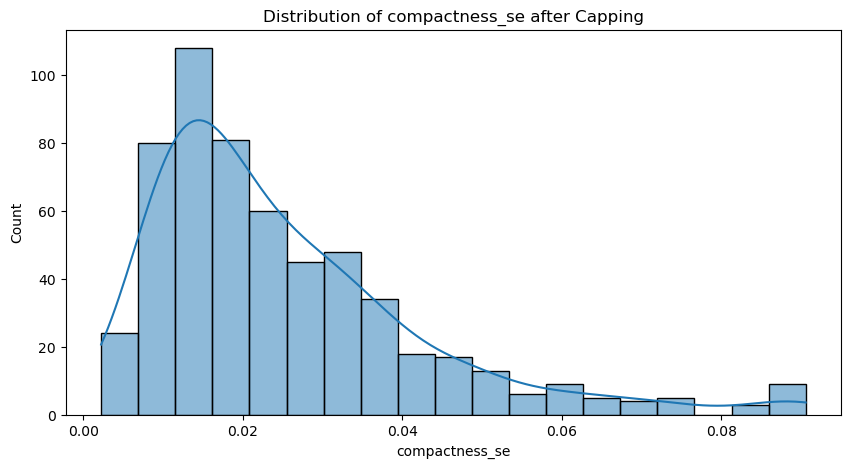

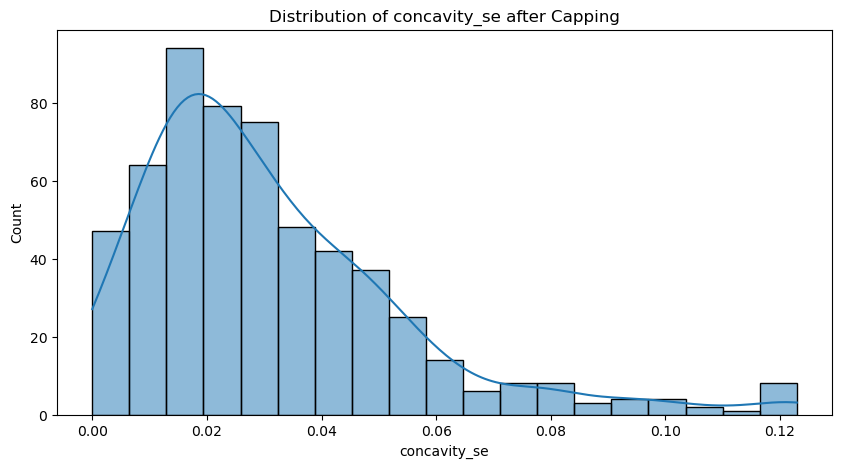

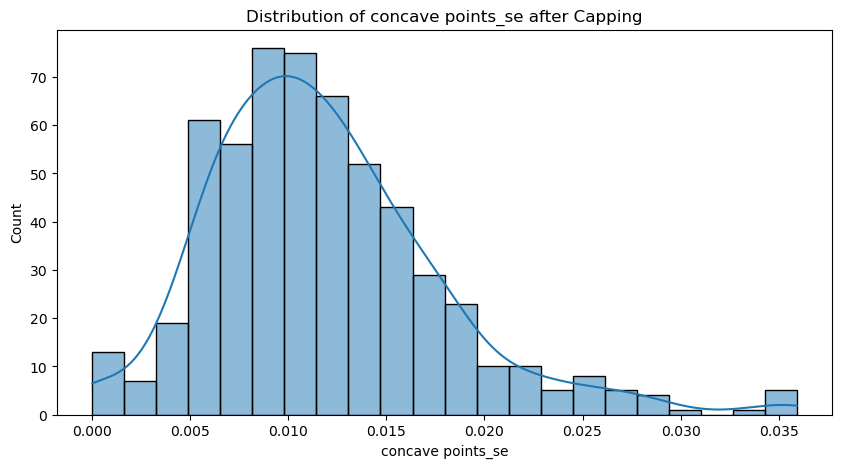

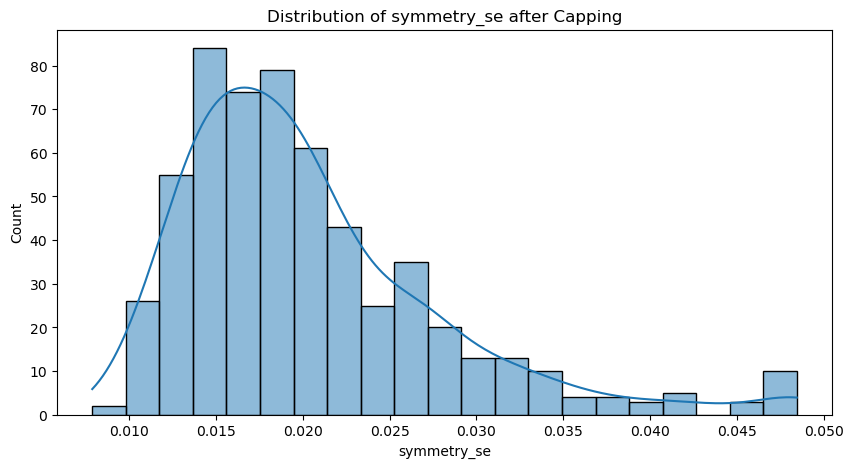

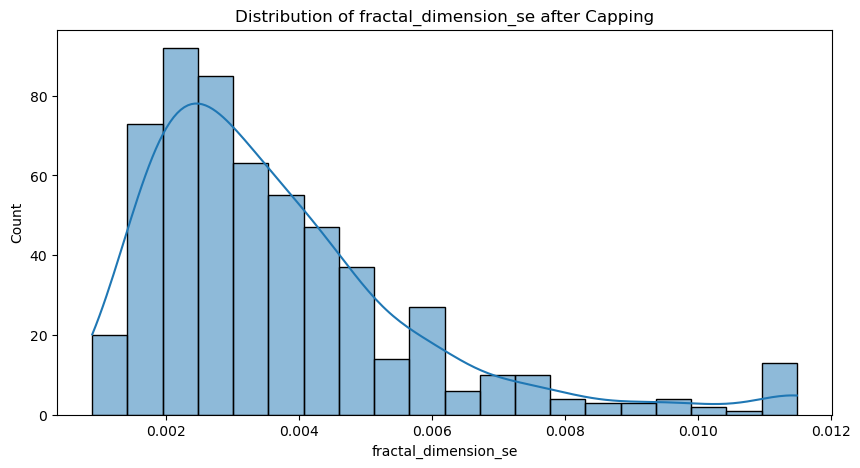

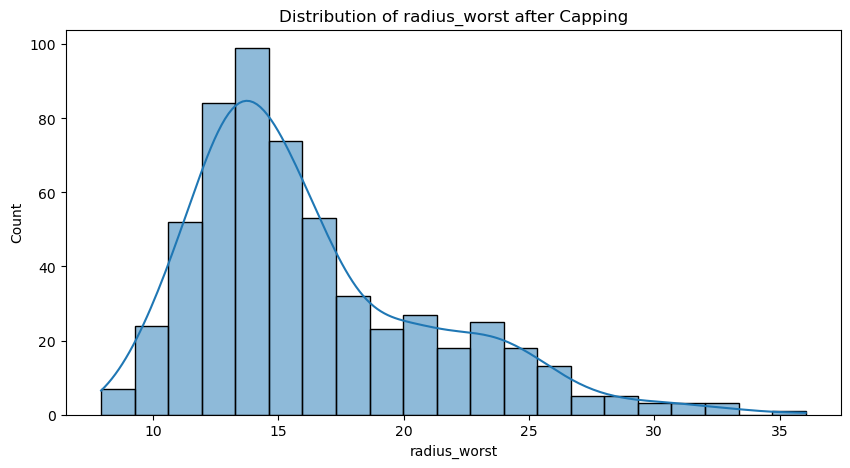

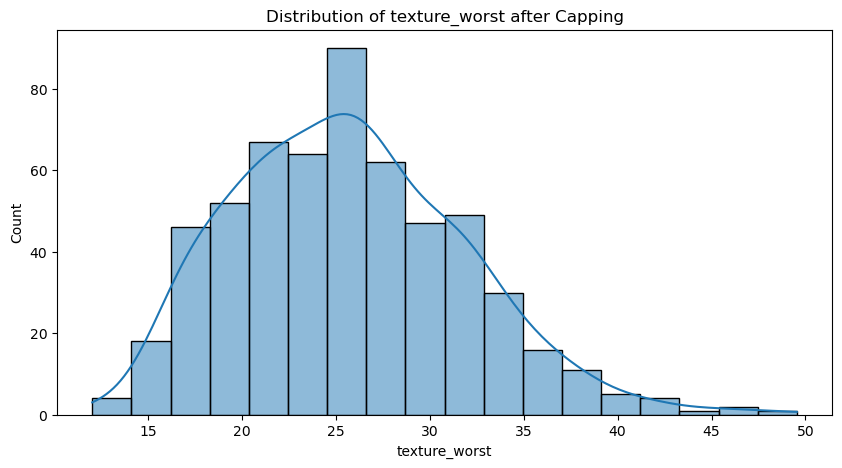

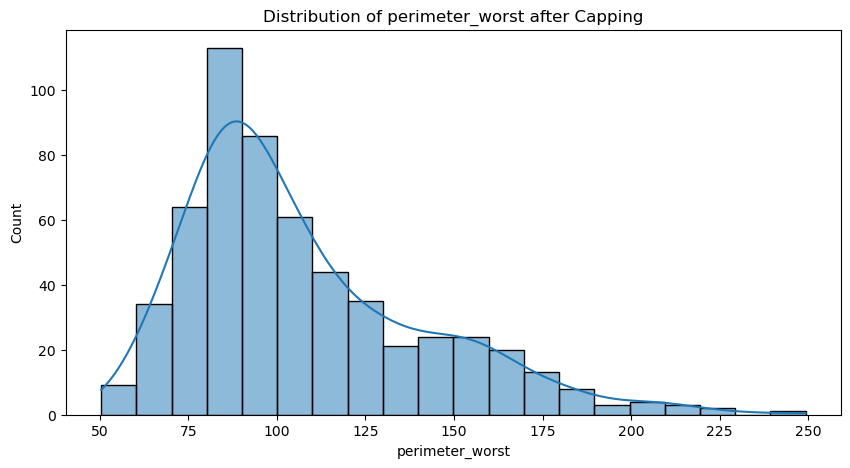

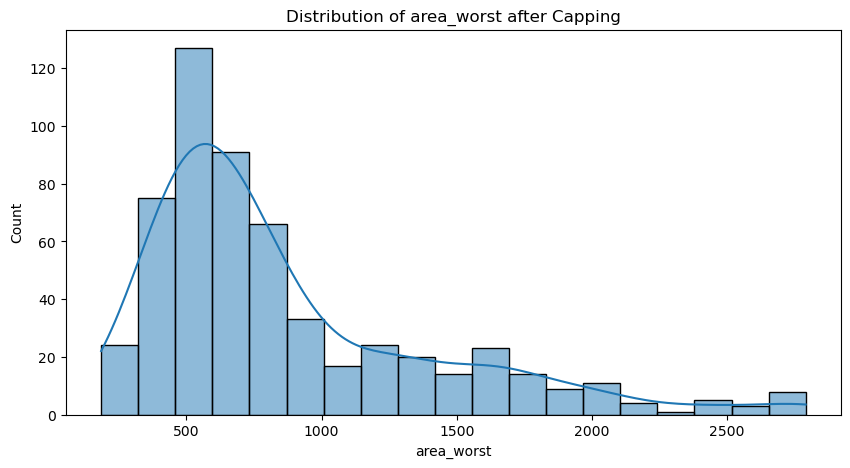

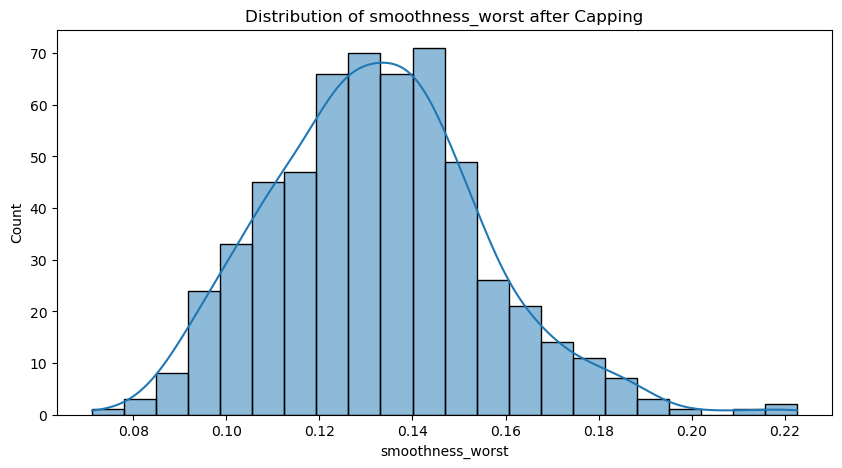

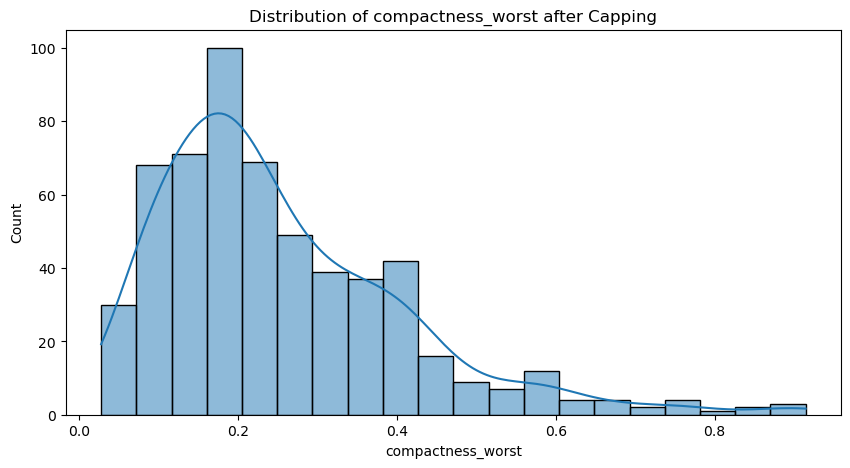

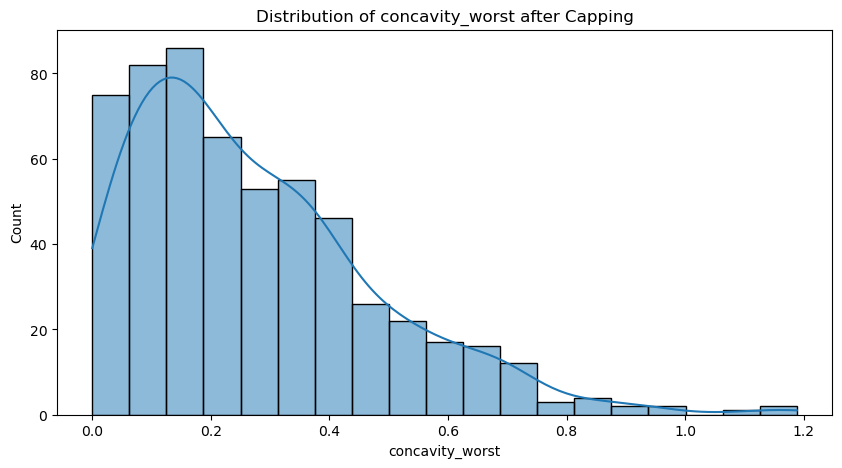

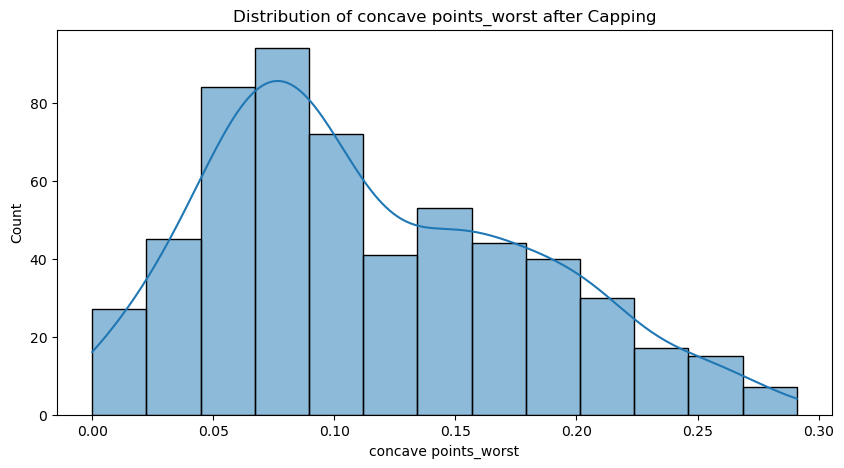

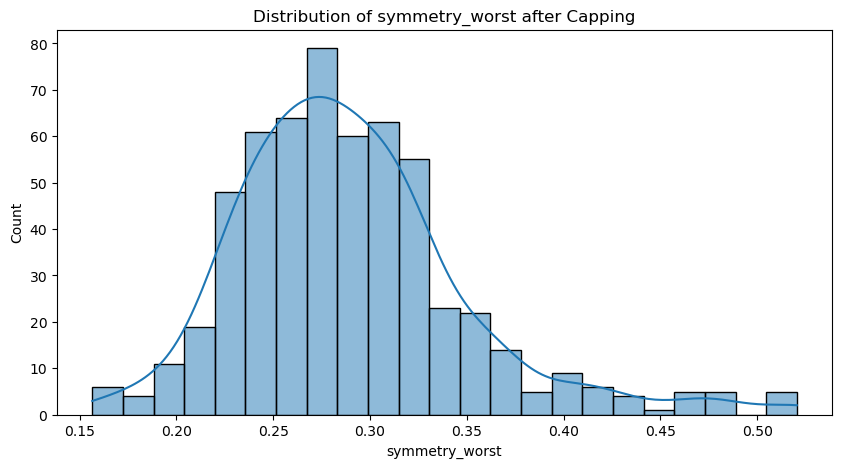

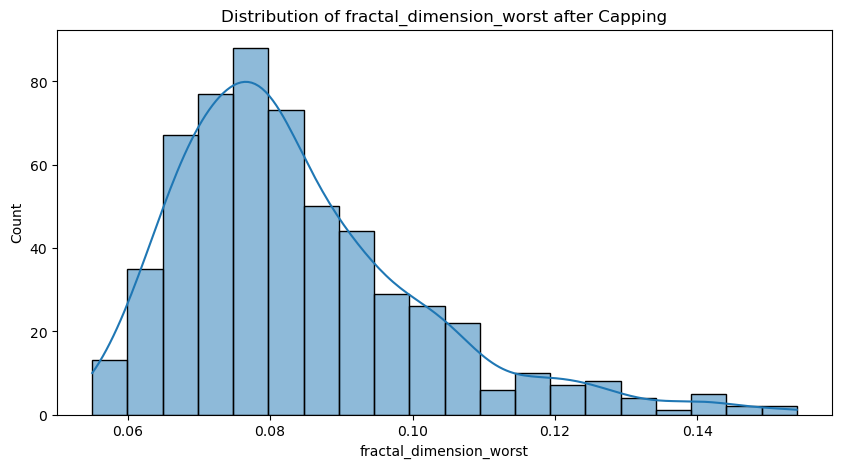

In [13]:
# Visualize the data to confirm capping
for column in columns_to_check:
    if column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column} after Capping')
        plt.show()

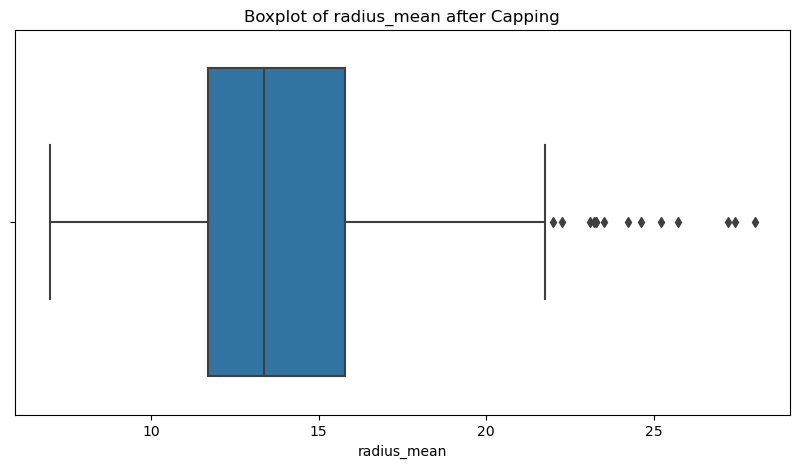

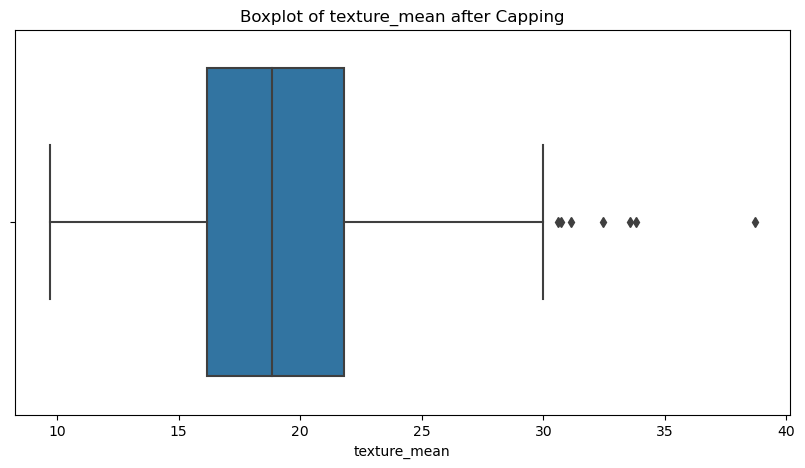

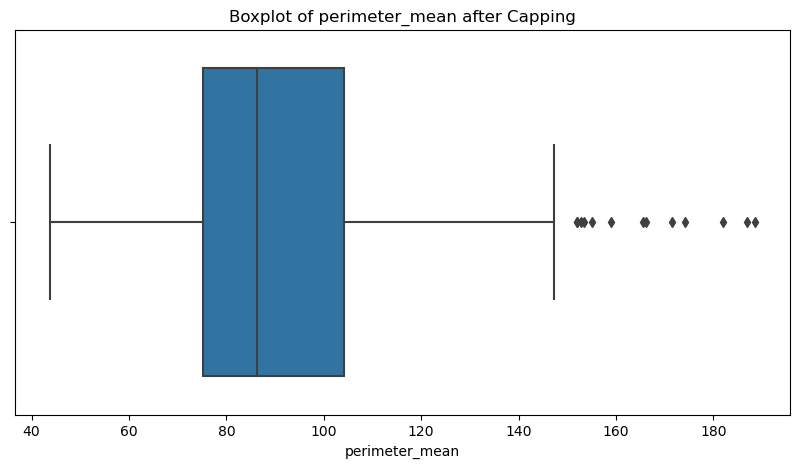

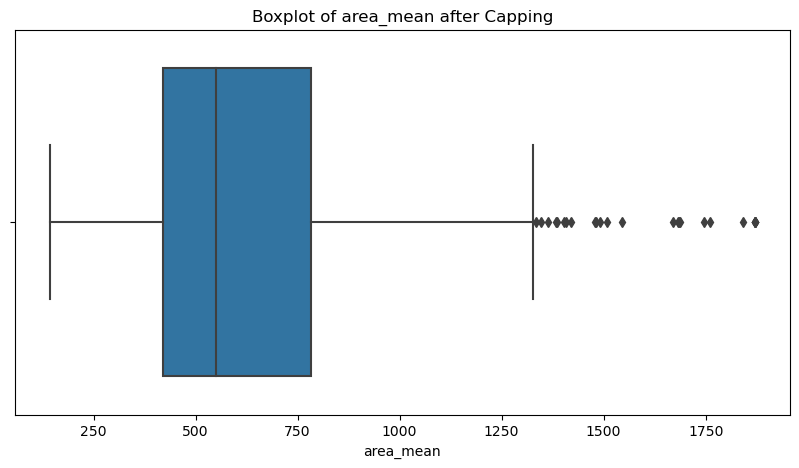

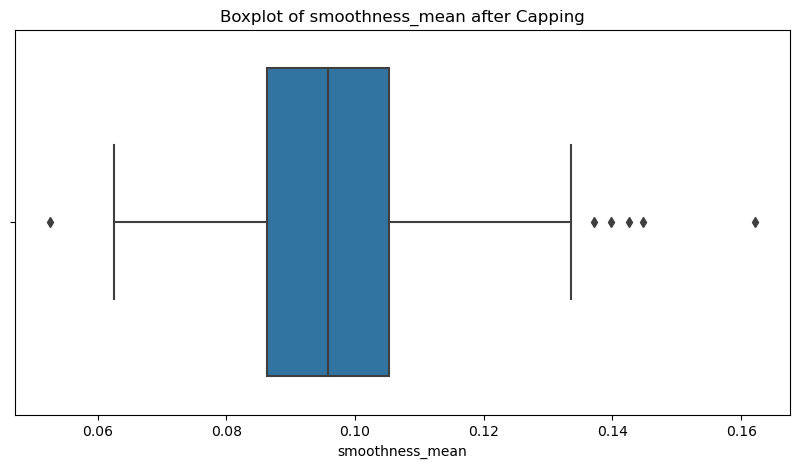

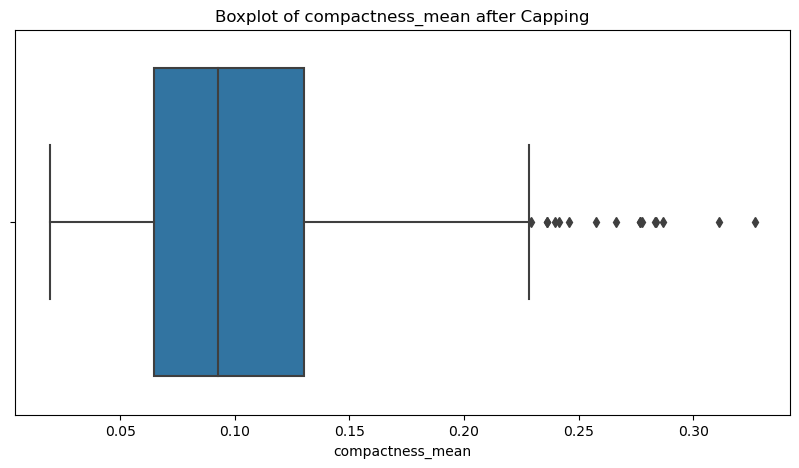

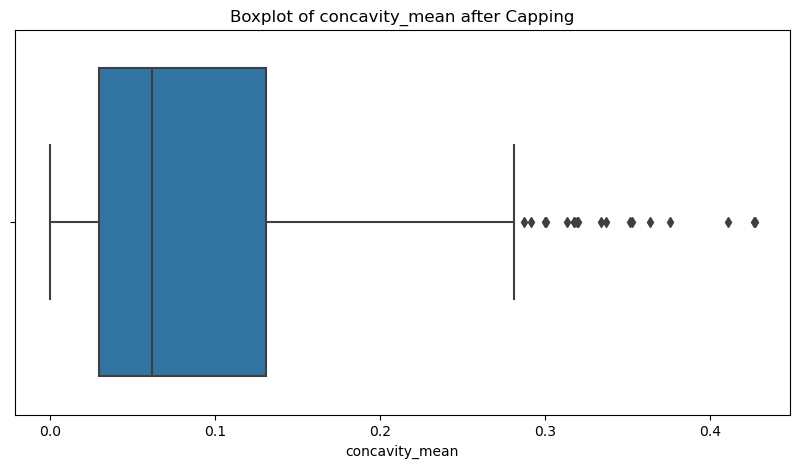

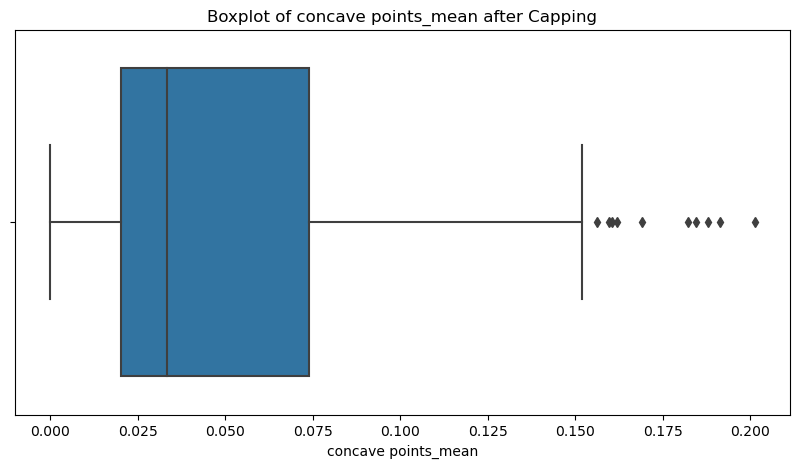

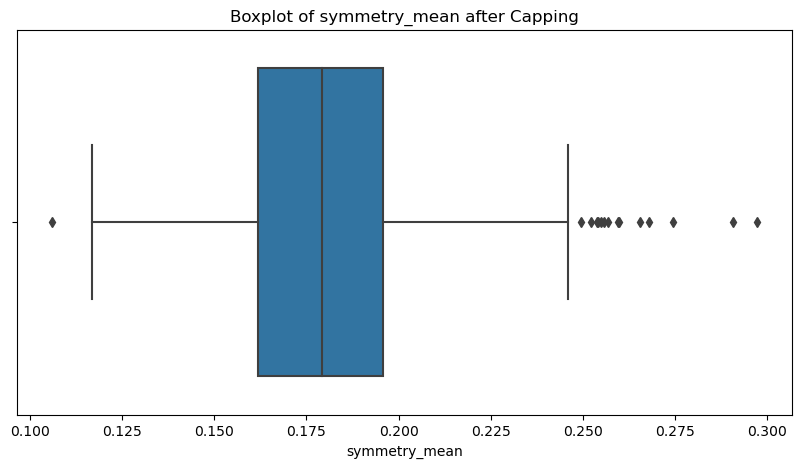

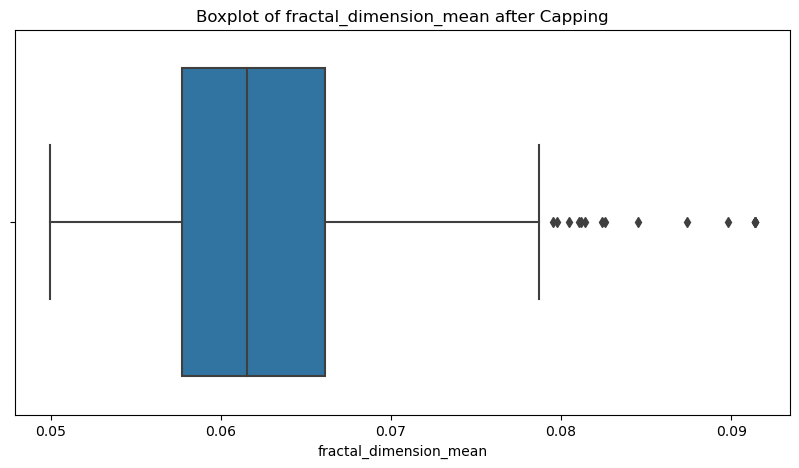

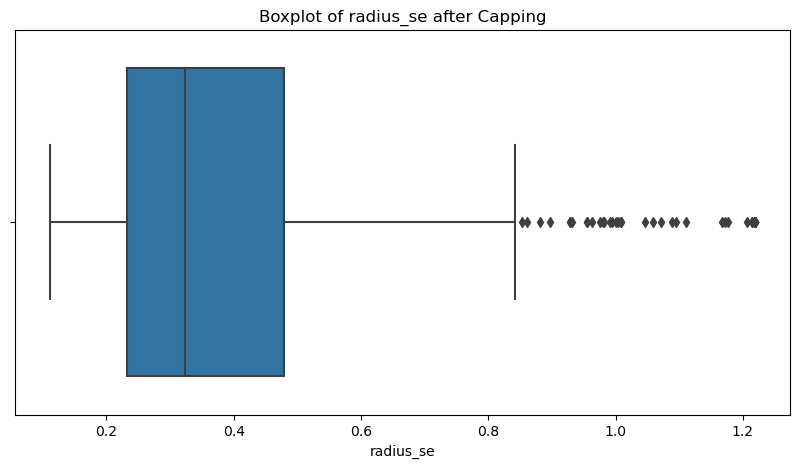

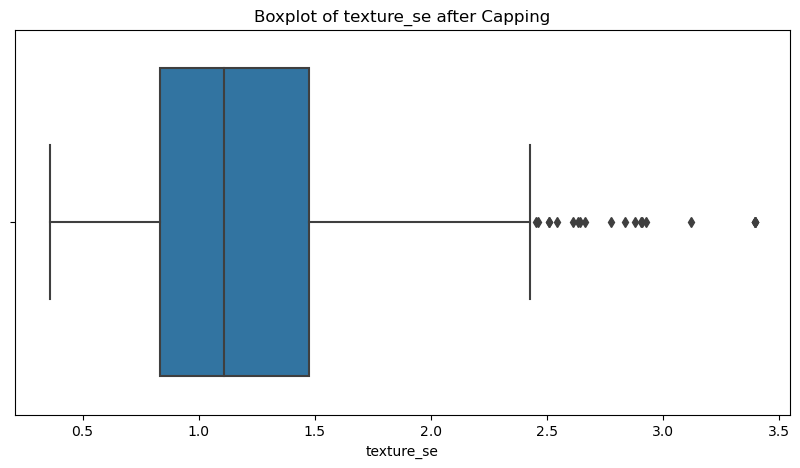

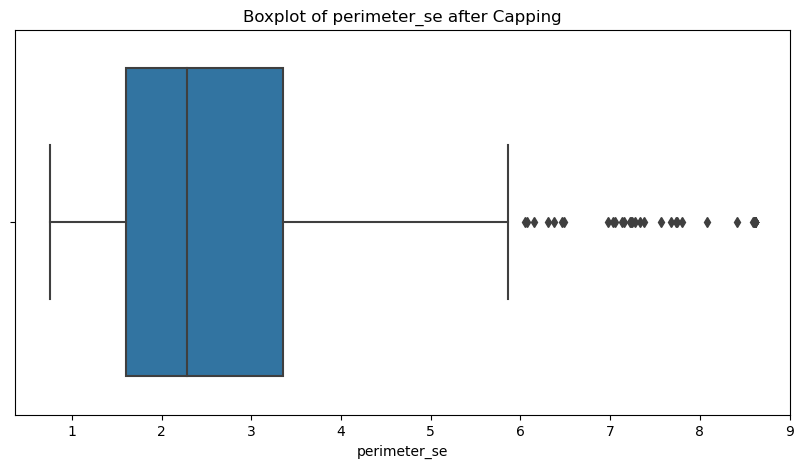

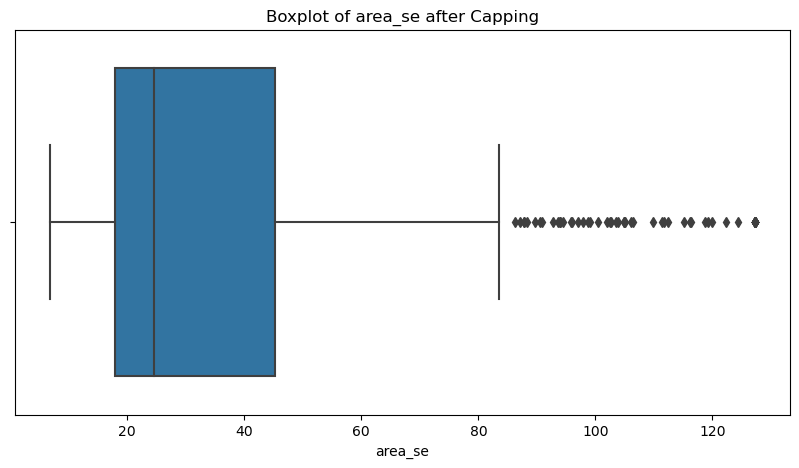

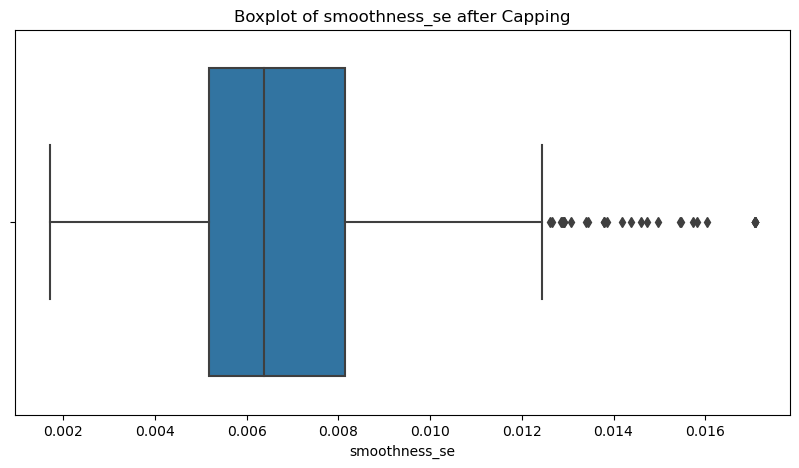

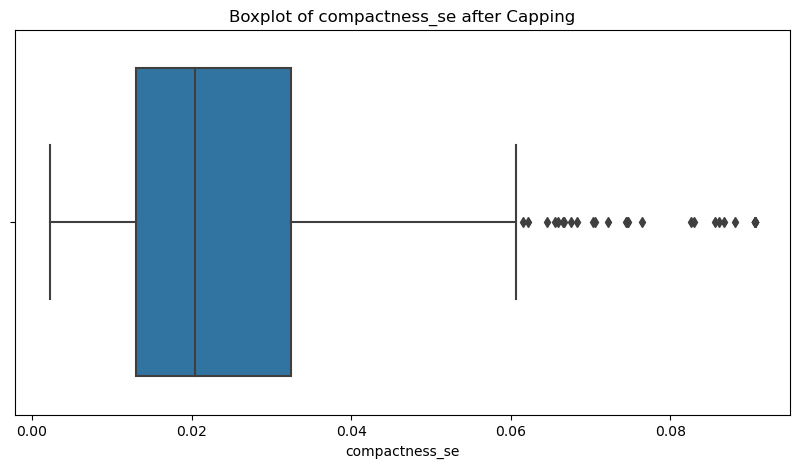

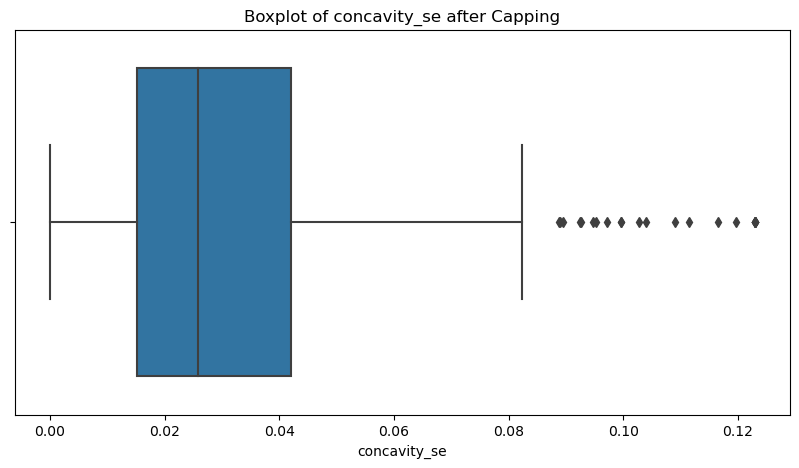

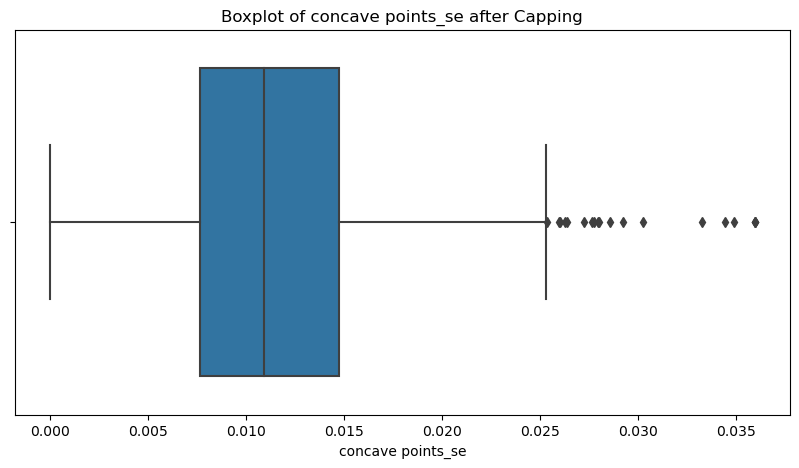

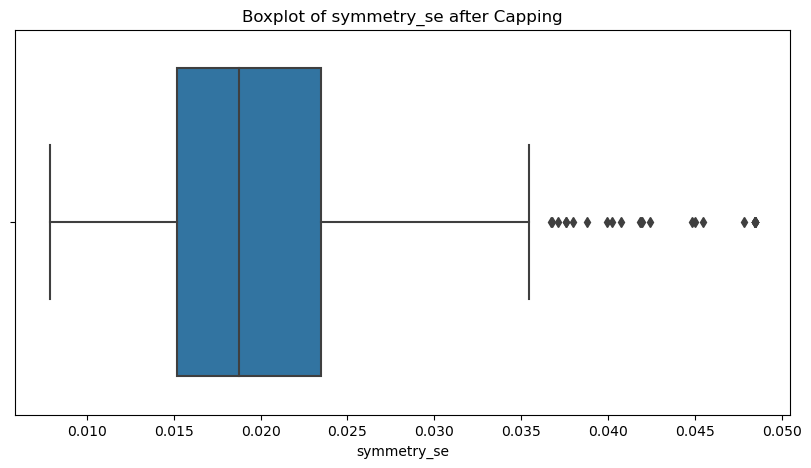

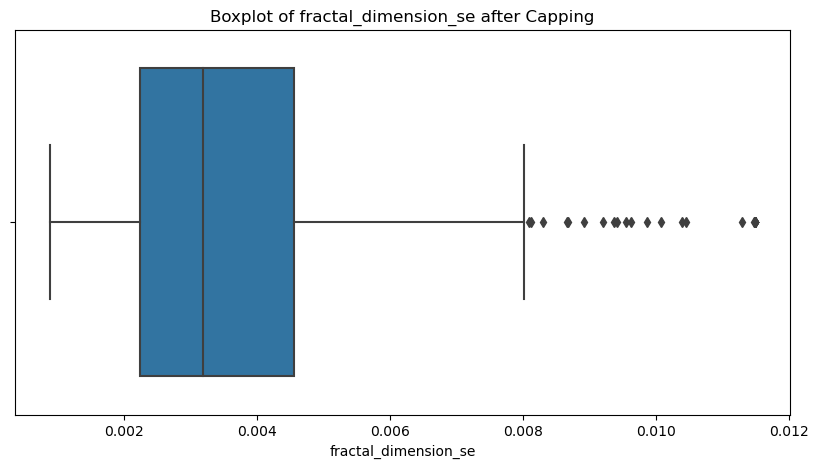

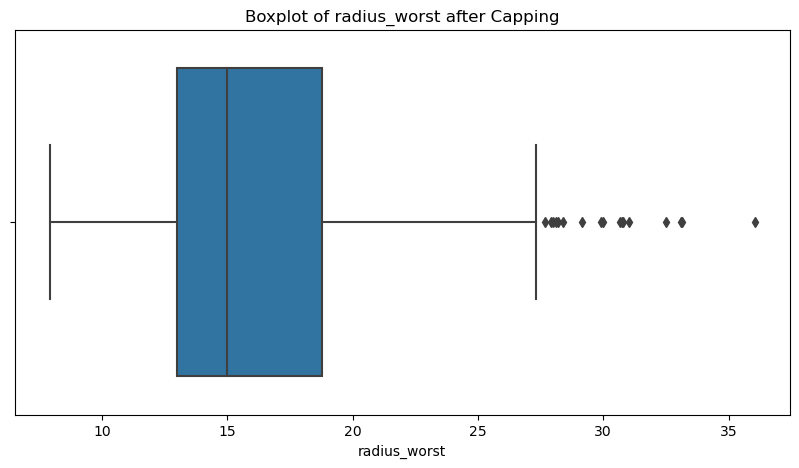

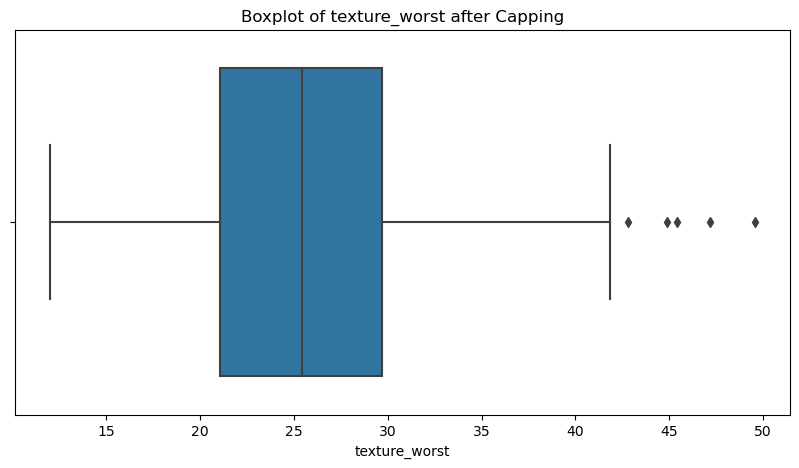

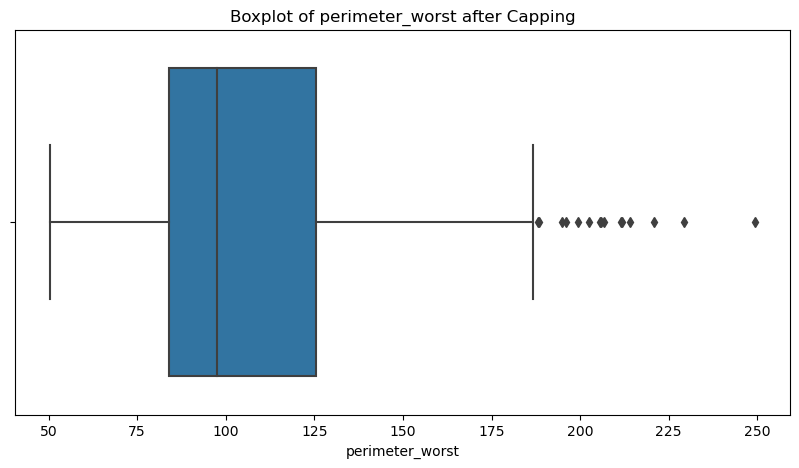

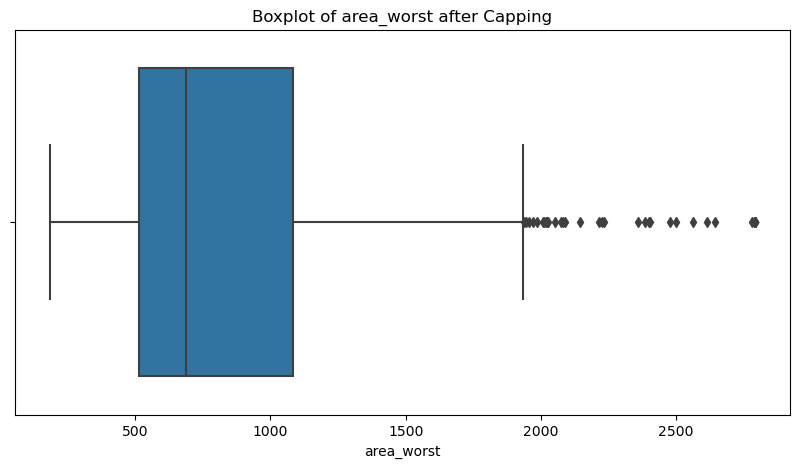

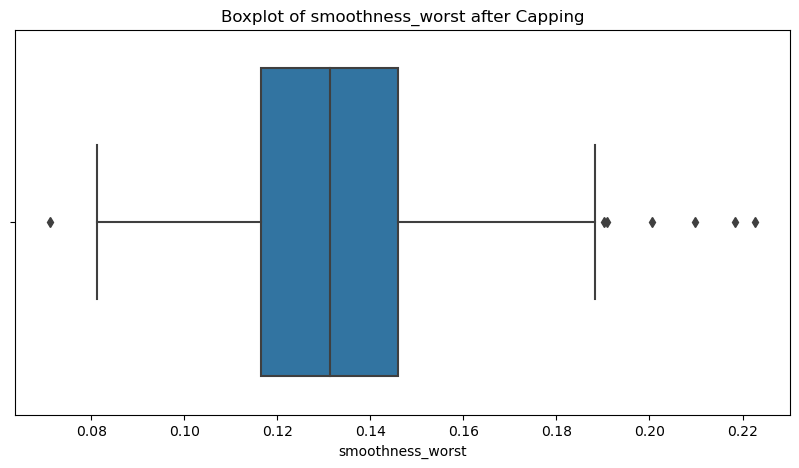

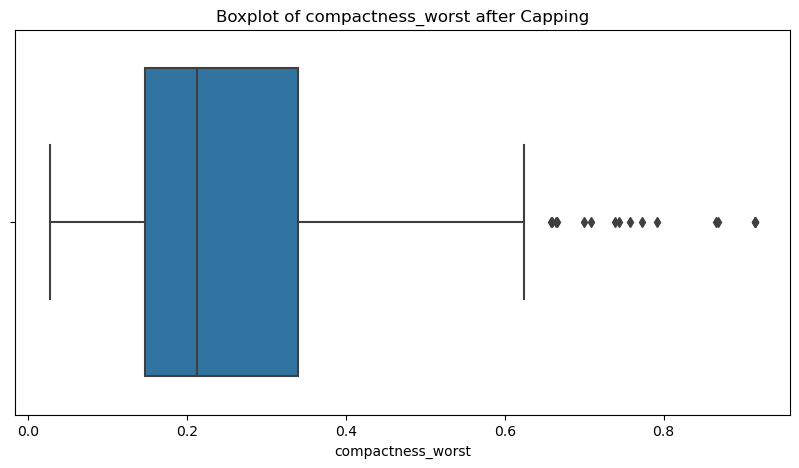

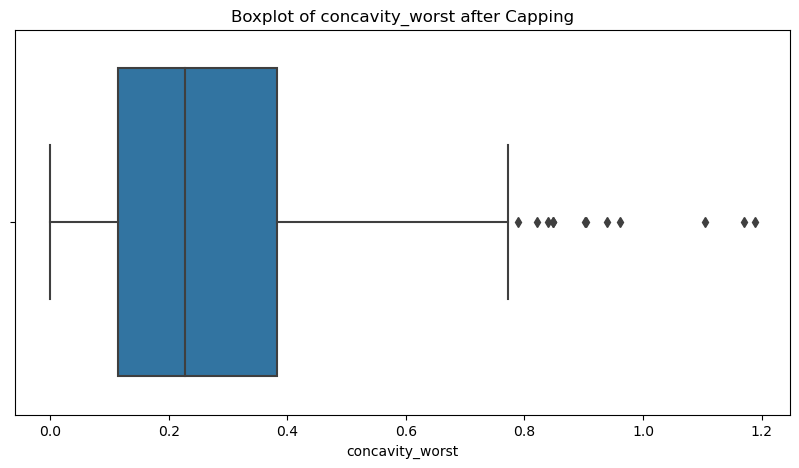

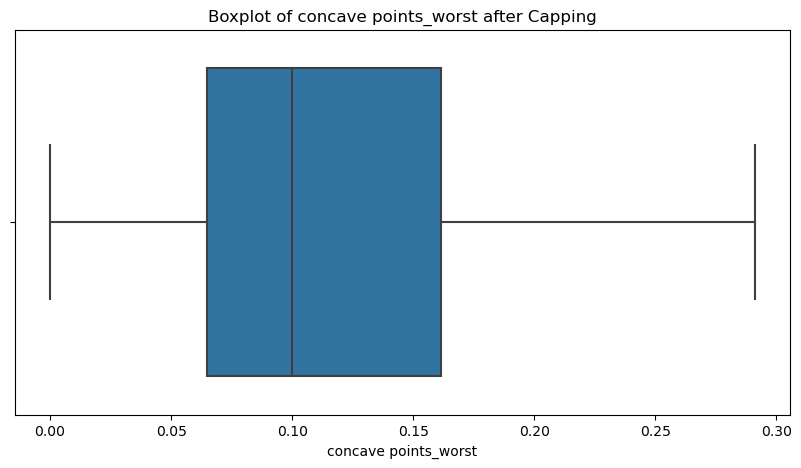

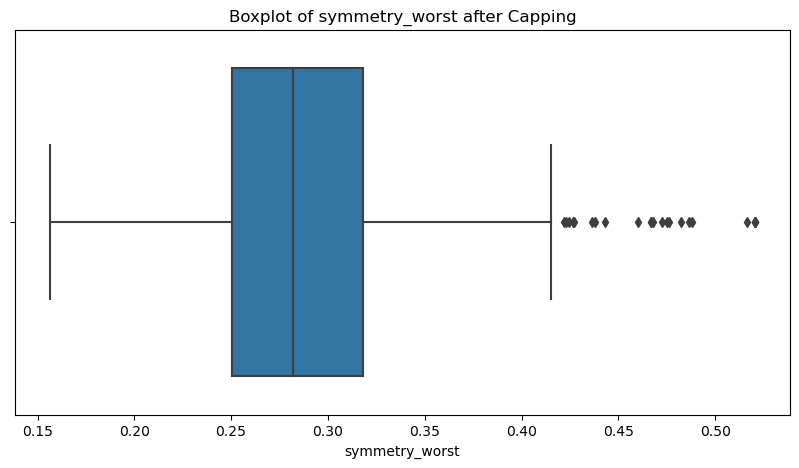

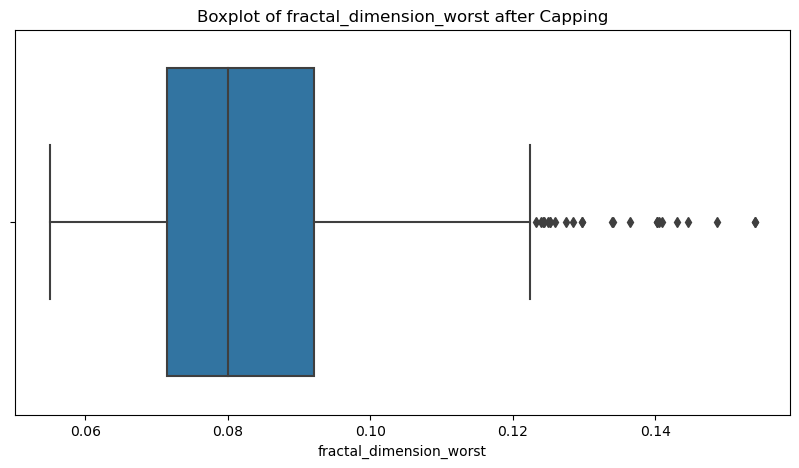

In [14]:
# Example: Re-run EDA to understand changes
for column in columns_to_check:
    if column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column} after Capping')
        plt.show()


## We will analyze the distribution of benign (B) and malignant (M) cancers in the data on the graph with two unique features

### "M" = Malignant Cancer

### "B" = Benign Cancer

#### Basically A benign tumor has distinct, smooth, regular borders. A malignant tumor has irregular borders and grows faster than a benign tumor


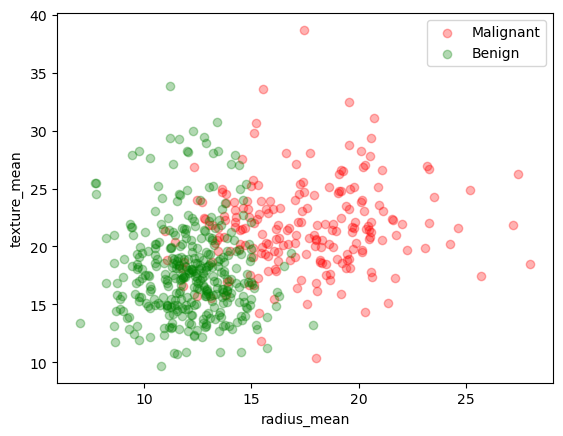

In [15]:
from sklearn.metrics import confusion_matrix
M = df[df.diagnosis == "M"] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == "B"] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

### Diagnosis Change 0 or 1¶
In order for the data to enter the classification algorithm and receive processing, it must not be object structured, so we convert this data into 1 and 0.

1 = M (Malignant Cancer Cell)

0 = B (Benign Cancer Cell)



In [16]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
y = df.diagnosis
x_data = df.drop(["diagnosis"],axis = 1)
print("X Data \n",x_data)
print("Y Data \n",y)

X Data 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_

###  Data Normalization 
we reduce all data to values between 0 and 1 so that operations can be performed and so that very large or very small values in the data cannot manipulate the data

 
The normalization process ensures that very high values or very low values in the data we have are brought between 0 and 1, thus preventing them from creating a margin of error in the prediction model. In this way, we get rid of high values and small values and bring them closer to other numbers.
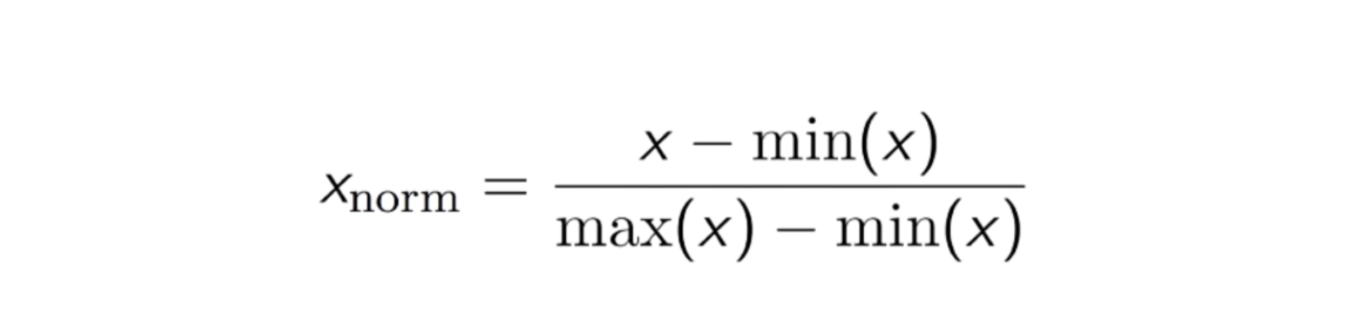

In [17]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x

C:\Users\gk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\gk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.523266,0.023119,0.545989,0.496698,0.600859,0.839849,0.703140,0.731113,0.711146,0.694109,...,0.620776,0.141525,0.674796,0.703981,0.601136,0.719214,0.599192,0.912027,0.834295,0.645703
1,0.645896,0.278123,0.615783,0.684951,0.293349,0.192741,0.203608,0.348757,0.393511,0.161999,...,0.606901,0.303571,0.545057,0.679796,0.347553,0.179502,0.203350,0.639175,0.325639,0.343579
2,0.604069,0.398206,0.595743,0.613705,0.520464,0.457035,0.462512,0.635686,0.527996,0.242154,...,0.556386,0.360075,0.513376,0.584974,0.483590,0.447556,0.379093,0.835052,0.562792,0.329019
3,0.210989,0.368185,0.233501,0.140524,0.821031,0.860340,0.565604,0.522863,0.804291,1.000000,...,0.248310,0.385928,0.243689,0.146839,0.915472,0.945353,0.578150,0.884880,1.000000,1.000000
4,0.632587,0.159765,0.630986,0.668153,0.435502,0.368894,0.463918,0.518390,0.391941,0.214148,...,0.519744,0.123934,0.511868,0.533533,0.437364,0.200234,0.336672,0.558419,0.219566,0.219818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.692951,0.437543,0.678668,0.773575,0.533254,0.313927,0.571462,0.690358,0.348509,0.151376,...,0.623266,0.383262,0.581766,0.707052,0.461137,0.207333,0.345678,0.761512,0.136026,0.162892
565,0.624982,0.639752,0.604036,0.647301,0.412662,0.273271,0.337395,0.486630,0.362114,0.129648,...,0.560655,0.699094,0.525948,0.593420,0.300007,0.185812,0.270600,0.559450,0.276724,0.114560
566,0.457199,0.633885,0.445788,0.413925,0.291613,0.269694,0.216753,0.263519,0.277342,0.157412,...,0.393099,0.589019,0.383637,0.360398,0.282177,0.317867,0.286424,0.487285,0.179445,0.234176
567,0.647322,0.677019,0.665538,0.649618,0.595377,0.837898,0.823336,0.755467,0.699634,0.487687,...,0.633582,0.730277,0.674796,0.627970,0.619626,0.947381,0.790085,0.910653,0.693048,0.697270


## Train and Test Split¶
#### Main data was divided into 70% training data and 30% test data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [19]:
# X_train data info
print("X Train")
x_train

X Train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,0.215742,0.180124,0.207864,0.152224,0.444637,0.190919,0.101406,0.145577,0.430665,0.282955,...,0.167912,0.244403,0.153223,0.117701,0.447269,0.147503,0.151839,0.330172,0.302006,0.233064
58,0.288464,0.331263,0.268261,0.222254,0.255527,0.060203,0.001621,0.020711,0.397174,0.121922,...,0.224120,0.272655,0.200292,0.168490,0.204253,0.039008,0.001553,0.038179,0.240176,0.079373
476,0.343125,0.373361,0.335982,0.275081,0.335100,0.297339,0.118627,0.151988,0.233386,0.244568,...,0.303095,0.406183,0.310218,0.246958,0.291422,0.355613,0.211430,0.460137,0.266282,0.238018
529,0.241884,0.128709,0.235229,0.174757,0.524118,0.229981,0.088590,0.139066,0.312402,0.389184,...,0.196371,0.099947,0.183597,0.140005,0.534438,0.153136,0.136520,0.254055,0.334158,0.257634
422,0.220020,0.217736,0.218851,0.153325,0.513155,0.316854,0.166284,0.223509,0.432234,0.319652,...,0.167556,0.203891,0.158503,0.111521,0.464439,0.213755,0.193755,0.379725,0.335807,0.194439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.608822,0.531746,0.598507,0.607333,0.446464,0.453783,0.596298,0.571074,0.597593,0.269676,...,0.522946,0.574627,0.494267,0.538907,0.371987,0.404288,0.477485,0.595189,0.478153,0.299393
144,0.179143,0.181504,0.169097,0.122683,0.231135,0.104111,0.052741,0.039140,0.177394,0.167069,...,0.143010,0.231876,0.137685,0.098276,0.240573,0.107052,0.082106,0.117285,0.201979,0.127907
72,0.485717,0.511042,0.486559,0.455225,0.497625,0.532167,0.396439,0.394831,0.453689,0.359971,...,0.547492,0.581023,0.508850,0.574225,0.576702,0.802368,0.552647,0.652577,0.480352,0.797371
235,0.335044,0.398206,0.317877,0.266392,0.347798,0.162850,0.034255,0.094235,0.239142,0.202559,...,0.263252,0.486674,0.240672,0.203578,0.379912,0.139728,0.052445,0.273643,0.181643,0.213650


In [20]:
# y_train data info  m =  1 and b = 0
print("Y Train")y_train

Y Train


249    0
58     0
476    0
529    0
422    0
      ..
129    1
144    0
72     1
235    0
37     0
Name: diagnosis, Length: 398, dtype: int64

In [21]:
print("X Test")
x_test

X Test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,0.366415,0.147343,0.376132,0.296918,0.461082,0.534118,0.339738,0.313121,0.536892,0.581845,...,0.303451,0.168443,0.320276,0.239549,0.396421,0.378824,0.270937,0.380756,0.346799,0.374520
47,0.294168,0.308834,0.291549,0.226541,0.577106,0.337345,0.287254,0.364811,0.558870,0.429986,...,0.275347,0.424574,0.263452,0.220431,0.709437,0.438654,0.421345,0.717526,0.641660,0.635592
292,0.283711,0.217736,0.271923,0.214435,0.437329,0.195310,0.144213,0.167495,0.350602,0.355867,...,0.206688,0.210821,0.193101,0.153634,0.509344,0.202263,0.188620,0.362887,0.498763,0.412538
186,0.538476,0.306073,0.516965,0.519868,0.303764,0.212385,0.191401,0.288966,0.293564,0.103573,...,0.475987,0.382196,0.446495,0.470191,0.344912,0.244741,0.297786,0.539863,0.450948,0.144995
414,0.387328,0.693582,0.365697,0.333642,0.279280,0.086743,0.109794,0.136133,0.414443,0.071946,...,0.331910,0.663380,0.300161,0.286460,0.288120,0.080416,0.130208,0.225945,0.458368,0.066835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.535624,0.354382,0.523875,0.519289,0.383702,0.291485,0.264058,0.367793,0.384092,0.180106,...,0.531839,0.416844,0.516896,0.545434,0.482269,0.259501,0.318492,0.663918,0.411652,0.289585
487,0.592186,0.314355,0.582614,0.592852,0.514069,0.407923,0.528585,0.593439,0.399267,0.270159,...,0.570260,0.489606,0.520416,0.596875,0.529816,0.388965,0.499621,0.707904,0.467436,0.354398
11,0.418223,0.282264,0.413309,0.369266,0.406267,0.357185,0.233224,0.328330,0.409210,0.262192,...,0.444326,0.406716,0.432918,0.427579,0.451892,0.601244,0.333726,0.621993,0.611981,0.503134
268,0.279909,0.224293,0.266671,0.213566,0.380230,0.139238,0.091378,0.080268,0.497122,0.186625,...,0.212380,0.309701,0.195414,0.158279,0.359440,0.172967,0.167663,0.198625,0.560319,0.157533


In [22]:
print("Y Test")
y_test

Y Test


421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: diagnosis, Length: 171, dtype: int64

## Find K Values for KNN
### We draw a graph to find the perfect k values. The value we choose is 3

C:\Users\gk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

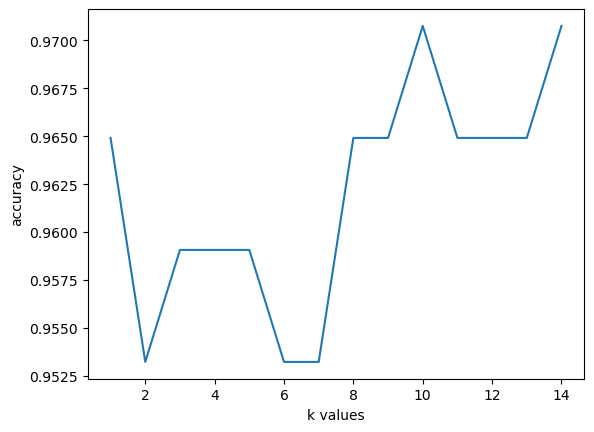

In [23]:
from sklearn.neighbors import KNeighborsClassifier
Score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    Score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),Score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

# K-NN Model¶
### Here we examine the accuracy score of the K-nn Model and we get a score of 0.953216373742690059 which indicates that we have trained a good model in general, of course, better results can be obtained by playing with the values.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Accuracy Score")
print("------------------------")
print("{} nn Acc Score {} ".format(3,knn.score(x_test,y_test)))
print("------------------------\n\n")

Accuracy Score
------------------------
3 nn Acc Score 0.9590643274853801 
------------------------




C:\Users\gk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

###### Confusion Matrix

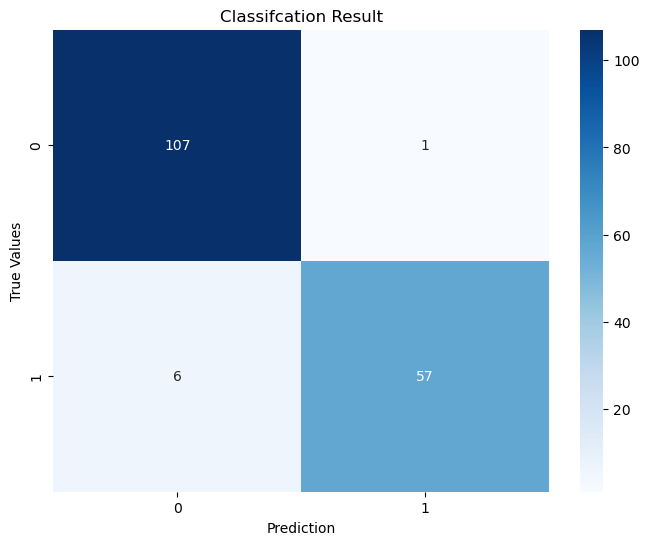

In [25]:
#seaborntable
cm = confusion_matrix(y_test, prediction.reshape(-1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()

In [30]:
print("\n")
print("Result Evaluation")
print("************************")
print(f'Sum True Prediction: {correct_predictions}\n')
print(f'Sum False Prediction: {incorrect_predictions}\n')



Result Evaluation
************************
Sum True Prediction: 164

Sum False Prediction: 7



## Result
### 🏆 Test accuracy: 95.32% (3 nn)
### 📊 Result Evaluation
### Sum True Prediction: 163

### Sum False Prediction: 8